In [1]:
library(ggplot2)
library(readr)
library(ggtree)
library(RColorBrewer)
library(ape)
library(dplyr)
library(tibble)
library(see)
library(ggrepel)
library(cowplot)
library(tidyr)
library(stringr)

tree_clean_path <- '/data1/shusuke/Cartography/For_paper_250401/Fig_3/treetime/timetree_no_outlier_updated.nwk'
tree_clean <- read.tree(tree_clean_path)

divtree_path <- '/data1/shusuke/Cartography/For_paper_250401/Fig_3/treetime/divergence_tree_no_outlier_updated.nwk'
divtree <- read.tree(divtree_path)

# Load dates information inferred from treetime
dates <- read.csv("/data1/shusuke/Cartography/For_paper_250401/Fig_3/treetime/dates.tsv", sep = "\t")
colnames(dates) <- c('label', 'date', 'numdate')
dates$numdate <- as.numeric(dates$numdate)

antigDist <- read.csv("/data1/shusuke/Cartography/For_paper_250401/Fig_3/antigenic_distance_byNodes_isomap_updated_250414.csv")

ggtree v3.14.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194


Attaching package: ‘ape’


The following object is masked from ‘package:ggtree’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘see’


The following object is masked from ‘package:ggtree’:

    geom_point2



Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand


Warning message:
“NAs introduced by coercion”


In [2]:
colnames(antigDist)
antigDist$child_year

[1] "label"                                   
[2] "antigenic_distance"                      
[3] "cumulative_antigenic_distance"           
[4] "geodesic_distance_from_root_at_childnode"
[5] "geodesic_distance_from_root_delta"       
[6] "child_year"

[1] 1966 1969 1971 1972 1966 1967 1968 1968 1967 1968 1967 1968 1970 1967
  [15] 1968 1969 1967 1968 1971 1967 1968 1968 1969 1971 1970 1971 1971 1967
  [29] 1971 1972 1972 1974 1974 1974 1974 1975 1975 1967 1967 1967 1972 1974
  [43] 1974 1967 1967 1967 1983 1986 1968 1968 1974 1975 1975 1976 1977 1977
  [57] 1977 1973 1974 1975 1976 1975 1978 1975 1976 1976 1978 1978 1979 1979
  [71] 1980 1979 1980 1981 1980 1983 1981 1982 1982 1983 1978 1979 1978 1979
  [85] 1979 1980 1983 1981 1982 1982 1981 1982 1982 1983 1984 1985 1982 1984
  [99] 1984 1982 1982 1982 1983 1985 1984 1985 1986 1983 1983 1985 1985 1983
 [113] 1985 1984 1985 1985 1985 1984 1986 1986 1984 1985 1988 1984 1986 1984
 [127] 1985 1985 1986 1988 1987 1988 1989 1985 1987 1987 1989 1987 1986 1987
 [141] 1987 1988 1988 1986 1987 1987 1987 1986 1987 1990 1987 1989 1989 1987
 [155] 1988 1989 1988 1989 1988 1990 1991 1987 1989 1989 1988 1988 1989 1989
 [169] 1988 1988 1989 1990 1988 1990 1991 1988 1989 1988 1989 1989 1992 1991
 [183] 1990 1991 1990 1991 1992 1990 1991 1992 1990 1991 1992 1992 1993 1988
 [197] 1991 1988 1989 1990 1991 1988 1991 1993 1993 1988 1988 1990 1992 1991
 [211] 1993 1991 1993 1992 1988 1991 1993 1993 1988 1988 1991 1993 1993 1988
 [225] 1992 1992 1994 1988 1990 1991 1993 1991 1992 1994 1994 1991 1993 1991
 [239] 1994 1993 1988 1988 1989 1991 1993 1992 1994 1992 1994 1993 1991 1991
 [253] 1993 1992 1993 1993 1992 1994 1994 1992 1994 1993 1995 1994 1995 1993
 [267] 1995 1994 1994 1994 1991 1993 1991 1993 1991 1991 1991 1994 1993 1992
 [281] 1994 1992 1993 1992 1993 1994 1992 1994 1992 1994 1993 1996 1997 1999
 [295] 1993 1995 1995 1993 1995 1996 1994 1995 1995 1993 1995 1995 1994 1995
 [309] 1995 1994 1994 1995 1995 1994 1996 1996 1995 1996 1996 1997 1997 1997
 [323] 1995 1996 1995 1996 1997 1994 1996 1996 1995 1996 1997 1994 1996 1995
 [337] 1996 1996 1996 1995 1996 1996 1994 1996 1994 1996 1997 1995 1996 1996
 [351] 1995 1996 1996 1995 1996 1996 1996 1997 1997 1994 1996 1995 1996 1995
 [365] 1996 1996 1995 1995 1997 1997 1995 1997 1997 1997 1995 1997 1995 1998
 [379] 1995 1997 1997 1995 1998 1995 1999 1996 1998 1996 1998 1998 1999 1996
 [393] 1998 1998 1995 1995 1998 1995 1996 1998 1996 1998 1996 1997 1998 1998
 [407] 1996 1997 1998 1998 1997 1997 1998 1999 1997 1998 1997 1998 1997 1998
 [421] 1997 1998 1997 1998 1997 1999 1998 1995 1997 1998 1997 1998 1999 1997
 [435] 1999 1999 1998 1999 1999 1999 2000 1995 1996 1999 1999 1996 1996 1996
 [449] 1999 1996 1998 2000 2000 1996 1997 1997 2000 1997 2001 1997 1998 1999
 [463] 1999 2001 2001 1999 1999 2002 2000 2001 2000 2001 2001 2000 2002 2000
 [477] 2002 2002 1997 1998 1999 1998 2000 1999 2000 1998 1998 1999 2000 1998
 [491] 1999 2000 2000 1998 2000 1998 2000 1998 1999 2000 2000 1998 1999 2001
 [505] 2001 1999 2000 2000 2000 1996 1996 1999 1996 1997 1997 1997 1999 1999
 [519] 1997 1999 1997 1998 1999 1999 1997 1998 2000 1998 1999 2000 1997 1998
 [533] 1999 1999 2001 2001 2001 2001 2000 2002 2001 2003 1999 2001 2002 2000
 [547] 2000 2002 2002 2000 2001 2000 2002 2002 2000 2001 2002 2000 2002 2001
 [561] 2002 2001 2002 2001 2002 2002 2002 2002 2001 2002 2002 2000 2002 2000
 [575] 2002 2000 2003 2001 2002 2002 2002 2002 2000 2001 2000 2002 2001 2002
 [589] 2003 2000 2003 2001 2001 2001 2003 2003 2000 2001 2001 2002 2002 2001
 [603] 2001 2002 2002 2003 2003 1997 1998 1999 1999 1999 1999 2001 1999 2000
 [617] 2001 1998 1999 2000 2000 1998 2000 1998 2001 1998 1998 2001 1999 2000
 [631] 1999 2000 2000 1998 1999 2000 2000 1999 1999 2001 2001 1999 2000 2001
 [645] 1999 2000 2002 2001 1999 2000 2002 2000 2002 2001 2002 2001 2004 2002
 [659] 1999 2000 2001 2000 2001 2002 2002 2001 2002 2001 2002 2001 2002 2003
 [673] 1999 2001 2003 2003 1999 2001 2001 2002 2003 2001 2003 2001 2003 2001
 [687] 2002 2003 1999 2002 2000 2000 2002 2002 2000 2001 2003 2003 2001 2001
 [701] 2002 2002 2003 2002 2003 2003 2005 2004 2004 2003 2004 2004 2001 2001
 [715] 2002 2003 2001 2001 2003 2003 2001 2002 2003 2003 2001 2002 2001 2001

In [3]:
# remove the data with na values
antigDist <- antigDist[!is.na(antigDist$child_year), ]
# reset the index
rownames(antigDist) <- NULL

In [5]:
# read another csv
PLANT_cluster_path <- '/data1/shusuke/Cartography/For_paper_250401/PLANT_coord_FromJumpei_250411/PLANT_ancestral_sequences_with_coords_metacluster.csv'
PLANT_cluster <- as_tibble(read_csv(PLANT_cluster_path))

Rows: 4520 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, seq, metacluster2
dbl (4): z1, z2, z3, metacluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
# rename the column 'ID' to 'label'
PLANT_cluster <- PLANT_cluster %>%
  rename(label = ID)
# check the column names
colnames(PLANT_cluster)

[1] "label"        "seq"          "z1"           "z2"           "z3"          
[6] "metacluster"  "metacluster2"

In [7]:
# merge the two dataframes by 'label'
antigDist_cluster <- antigDist %>%
  left_join(PLANT_cluster, by = "label")

In [8]:
antigDist_cluster$metacluster2 <- as.character(antigDist_cluster$metacluster2)
antigDist_cluster$metacluster2

[1] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [11] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [21] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [31] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [41] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [51] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [61] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [71] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [81] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
  [91] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [101] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [111] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [121] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [131] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [141] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [151] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [161] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [171] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [181] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [191] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [201] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [211] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [221] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [231] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [241] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [251] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [261] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [271] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [281] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [291] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [301] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [311] "m 1"  "m 1"  "m 1"  "m 1"  "m 2"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [321] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [331] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [341] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 2"  "m 1"  "m 1"  "m 1" 
 [351] "m 1"  "m 1"  "m 1"  "m 1"  "m 2"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [361] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1" 
 [371] "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 1"  "m 2"  "m 2"  "m 2"  "m 2" 
 [381] "m 2"  "m 2"  "m 1"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [391] "m 2"  "m 2"  "m 1"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [401] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [411] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [421] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [431] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [441] "m 1"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [451] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [461] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 3"  "m 2"  "m 2" 
 [471] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [481] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [491] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [501] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 
 [511] "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2"  "m 2" 

In [9]:
antigDist_cluster$cumulative_antigenic_distance <- as.numeric(antigDist_cluster$cumulative_antigenic_distance)
antigDist_cluster$child_year <- as.numeric(antigDist_cluster$child_year)

In [11]:
# add metacluster to the tree as tip annotation
tree_annot <- full_join(tree_clean, dates, by = "label")
tree_annot <- full_join(tree_annot, PLANT_cluster, by = "label")
tree_annot@extraInfo$metacluster2 <- as.character(tree_annot@extraInfo$metacluster2)
tree_annot <- full_join(tree_annot, antigDist, by = "label")
tree_annot

'treedata' S4 object'.

...@ phylo:

Phylogenetic tree with 2703 tips and 1769 internal nodes.

Tip labels:
  EPI23772, EPI23776, EPI240955, EPI159312, EPI281164, EPI56904, ...
Node labels:
  , NODE_0000014, NODE_0000015, NODE_0000013, NODE_0000003, NODE_0000005, ...

Rooted; includes branch length(s).

with the following features available:
  '', 'date', 'numdate', 'seq', 'z1', 'z2', 'z3', 'metacluster',
'metacluster2', 'antigenic_distance', 'cumulative_antigenic_distance',
'geodesic_distance_from_root_at_childnode',
'geodesic_distance_from_root_delta', 'child_year'.

# The associated data tibble abstraction: 4,472 × 16
# The 'node', 'label' and 'isTip' are from the phylo tree.
    node label     isTip date       numdate seq       z1    z2    z3 metacluster
   <int> <chr>     <lgl> <chr>        <dbl> <chr>  <dbl> <dbl> <dbl>       <dbl>
 1     1 EPI23772  TRUE  1971-01-01    1971 QDLPG…  5.27 -8.34  5.90          20
 2     2 EPI23776  TRUE  1972-01-01    1972 QDLPG…  5.12 -8.26  5.90 

In [12]:
nextclade_path <- '/data1/shusuke/Cartography/GISAID_data/GISAID_seq_19650101_to_20250128/nextclade/nextclade.tsv'
nextclade <- read.csv(nextclade_path, sep = "\t")
nextclade

index 
1      31    
2      17    
3      10    
4      22    
5       1    
6       0    
7       3    
8      30    
9      28    
10     25    
11     27    
12     24    
13     14    
14      5    
15      9    
16      7    
17     18    
18     23    
19     12    
20      2    
21     20    
22     16    
23     19    
24      8    
25      6    
26     13    
27      4    
28     15    
29     26    
30     29    
⋮      ⋮     
189369 189365
189370 189376
189371 189367
189372 189372
189373 189377
189374 189375
189375 189370
189376 189378
189377 189363
189378 189368
189379 189369
189380 189386
189381 189382
189382 189387
189383 189379
189384 189381
189385 189380
189386 189389
189387 189383
189388 189384
189389 189390
189390 189385
189391 189391
189392 189392
189393 189388
189394 189396
189395 189397
189396 189393
189397 189394
189398 189395
       seqName                                                                                                                 
1      A/pintail_duck/ALB/86/1976|EPI_ISL_8807|A_/_H3N2|||3C.2|1976-08-13|HA|EPI90179                                          
2      A/Victoria/3/1975|EPI_ISL_1096|A_/_H3N2|||3C.2|1975-01-01|HA|EPI118970                                                  
3      A/Memphis/102/72|EPI_ISL_21051|A_/_H3N2|||unassigned|1972-01-01|HA|EPI118986                                            
4      A/Hong_Kong/1-9-MA21-2/1968|EPI_ISL_22615|A_/_H3N2|Mouselung_21+MDCK_2+egg_2||3C.2a4|1968-01-01|HA|EPI159304            
5      A/Bangkok/01/1979|EPI_ISL_10250|A_/_H3N2|||unassigned|1979-01-01|HA|EPI104947                                           
6      A/Hong_Kong/01/1968|EPI_ISL_245769|A_/_H3N2|||3C.2a4|1968-02-01|HA|EPI901058                                            
7      A/Texas/1/1977|EPI_ISL_114197|A_/_H3N2|xMDCK1||3C.3a|1977-01-01|HA|EPI365482                                            
8      A/Albany/3/1970|EPI_ISL_7269|A_/_H3N2|pRhMK_2||3C.2a4|1970-01-01|HA|EPI63899                                            
9      A/Hong_Kong/1-12-MA21-2/1968|EPI_ISL_22621|A_/_H3N2|Mouselung_21+MDCK_2+egg_2||3C.2a4|1968-01-01|HA|EPI159352           
10     A/Hong_Kong/1-11-MA21-2/1968|EPI_ISL_22618|A_/_H3N2|Mouselung_21+MDCK_2+egg_2||3C.2a4|1968-01-01|HA|EPI159328           
11     A/Hong_Kong/1-12-MA21-1/1968|EPI_ISL_22620|A_/_H3N2|Mouselung_21+MDCK_2+egg_2||3C.2a4|1968-01-01|HA|EPI159344           
12     A/Hong_Kong/1-11-MA21-1/1968|EPI_ISL_22617|A_/_H3N2|Mouselung_21+MDCK_2+egg_2||3C.2a4|1968-01-01|HA|EPI159320           
13     A/Memphis/105/1972|EPI_ISL_9279|A_/_H3N2|||3C.2a4|1972-01-01|HA|EPI96618                                                
14     A/Memphis/103/1972|EPI_ISL_9251|A_/_H3N2|||3C.2a4|1972-01-01|HA|EPI96086                                                
15     A/Memphis/1/71|EPI_ISL_21048|A_/_H3N2|||3C.2a4|1971-01-01|HA|EPI137302                                                  
16     A/England/72|EPI_ISL_66096|A_/_H3N2|Egg||3C.3a|1972-01-01|HA|EPI230566                                                  
17     A/Victoria/3/1975|EPI_ISL_1096|A_/_H3N2|||3C.2|1975-01-01|HA|EPI131278                                                  
18     A/Hong_Kong/1-9-MA21-3/1968|EPI_ISL_22616|A_/_H3N2|Mouselung_21+MDCK_2+egg_2||3C.2a4|1968-01-01|HA|EPI159312            
19     A/Udorn/72|EPI_ISL_66106|A_/_H3N2|Egg||3C.2a4|1972-01-01|HA|EPI230618                                                   
20     A/duck/Hokkaido/5/1977|EPI_ISL_522|A_/_H3N2|||unassigned|1977-01-01|HA|EPI2449                                          
21     A/Hong_Kong/1-1-MA-12/1968|EPI_ISL_22613|A_/_H3N2|CD-1_Mouselung_12,MDCK_plaque_2,+egg_2||3C.2a4|1968-01-01|HA|EPI159288
22     A/Memphis/108/1976|EPI_ISL_9281|A_/_H3N2|||3C.3a|1976-01-01|HA|EPI96656                                                 
23     A/Victoria/3/1975|EPI_ISL_1096|A_/_H3N2|||3C.2|1975-01-01|HA|EPI131300                                                  
24     A/Memphis/1/71|EPI_ISL_21048|A_/_H3N2|||3C.2a4|1971-01-01|HA

In [13]:
# split the first column of the table of nextclade by '|'and keep only the nineth field
nextclade_detailed <- nextclade %>%
  mutate(name = str_split(seqName, "\\|", simplify = TRUE)[, 9]) %>%
  rename(label = name)

In [15]:
# Get the RdPu palette (9 colors)
rdpu_colors <- brewer.pal(5, "RdPu")
# Replace the lightest color (first color) with a dark grayish tone
rdpu_modified <- rdpu_colors
rdpu_modified[1] <- "#B3CDE3"
rdpu_modified

[1] "#B3CDE3" "#FBB4B9" "#F768A1" "#C51B8A" "#7A0177"

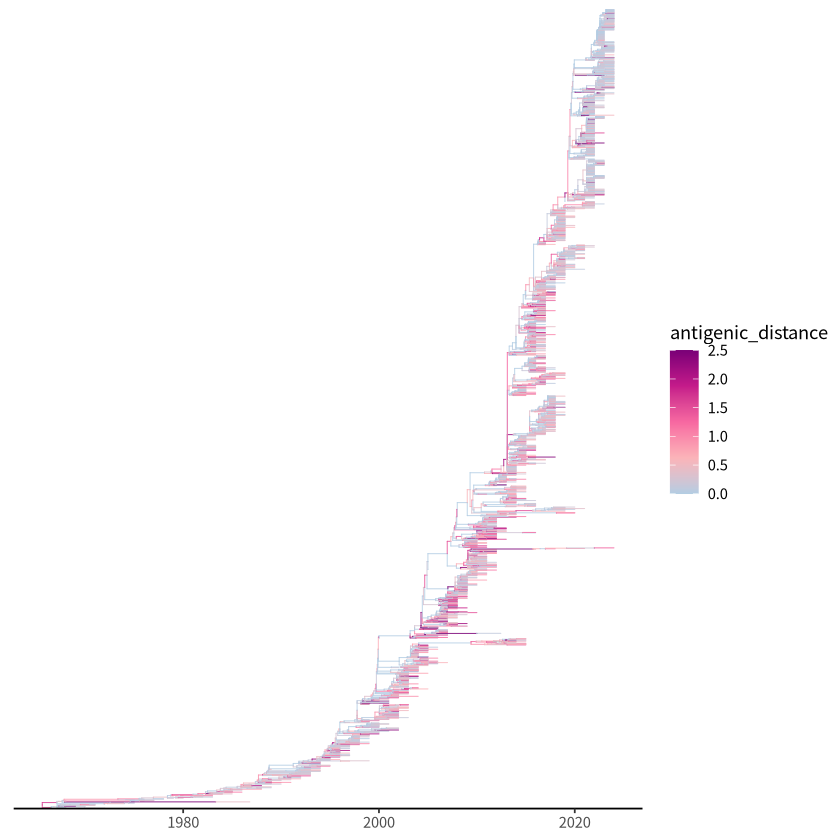

In [16]:
p <- ggtree(tree_annot, aes(color = antigenic_distance), mrsd = '2024-01-01', size = 0.3, alpha = 0.8) +
 #scale_color_viridis_c(option = "inferno", na.value = 'gray', begin = 1, end = 0, limits = c(0, 2)) +
 #geom_tippoint(aes(color = effect), size = 1, alpha=0.8) +
 scale_color_gradientn(colors = rdpu_modified, na.value = 'gray', limits = c(0, 2.5), oob = scales::squish) +
 #scale_color_distiller(palette = "BuPu", direction = 1, na.value = 'gray', begin = 0.2, limits = c(0, 2.5), oob = scales::squish) +
 #scale_color_gradient(low = "#f4ee9b", high = "#AE017E", na.value = 'gray', limits = c(0, 3), oob = scales::squish) +
 theme_tree2()
print(p)

In [17]:
list_of_tips <- tree_annot@phylo$tip.label

In [19]:
PLANT_metacluster <- PLANT_cluster %>%
    select(label, metacluster2) 
PLANT_metacluster$metacluster2 <- as.character(PLANT_metacluster$metacluster2)
PLANT_metacluster <- column_to_rownames(PLANT_metacluster, var = "label")
# remove 'm ' characters from the metacluster2 column
PLANT_metacluster$metacluster2 <- gsub("m ", "", PLANT_metacluster$metacluster2)
PLANT_metacluster$metacluster2 <- factor(PLANT_metacluster$metacluster2, levels = as.character(1:20))

In [20]:
levels(PLANT_metacluster$metacluster2)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20"

In [21]:
PLANT_metacluster

metacluster2
NODE_0000001 1           
NODE_0000014 1           
NODE_0000015 1           
EPI23772     1           
EPI23776     1           
NODE_0000013 1           
EPI80015     1           
NODE_0000003 1           
EPI240955    1           
EPI159312    1           
NODE_0000005 1           
EPI281164    1           
NODE_0000006 1           
EPI56904     1           
EPI23766     1           
NODE_0000000 1           
EPI144950    1           
EPI23858     1           
NODE_0000002 1           
EPI449150    1           
EPI23770     1           
NODE_0000012 1           
EPI131276    1           
NODE_0000009 1           
EPI92074     1           
NODE_0000010 1           
EPI91884     1           
NODE_0000011 1           
EPI362414    1           
EPI118982    1           
⋮            ⋮           
NODE_0002165 20          
NODE_0002727 20          
EPI3457961   20          
EPI3233111   20          
EPI3414914   19          
NODE_0002167 20          
EPI3460071   20          
NODE_0002169 20          
EPI3424235   20          
NODE_0002170 20          
EPI3193451   19          
NODE_0002171 20          
EPI3295244   20          
NODE_0002172 20          
EPI3431740   20          
NODE_0002173 20          
EPI3502331   20          
NODE_0002174 20          
EPI3373078   20          
NODE_0002176 20          
EPI3158186   20          
NODE_0002177 20          
EPI3434522   20          
NODE_0002178 20          
EPI3236171   20          
NODE_0002179 20          
EPI3230986   20          
NODE_0002180 20          
EPI3217549   20          
EPI3127362   20

In [24]:
my_colors2 <- c(
  "1"  = "gray", 
  "2"  = "#F8766D", 
  "3"  = "#E9842C",
  "4"  = "#D69100",
  "5"  = "#BC9D00",
  "6"  = "#9CA700",
  "7"  = "#6FB000",
  "8"  = "#00B813",
  "9"  = "#00BD61",
  "10" = "#00C08E",
  "11" = "#00C0B4",
  "12" = "#00BDD4",
  "13" = "#00B5EE",
  "14" = "#00A7FF",
  "15" = "#7F96FF",
  "16" = "#BC81FF",
  "17" = "#E26EF7",
  "18" = "#F863DF",
  "19" = "#FF62BF",
  "20" = "#FF6A9A"
)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


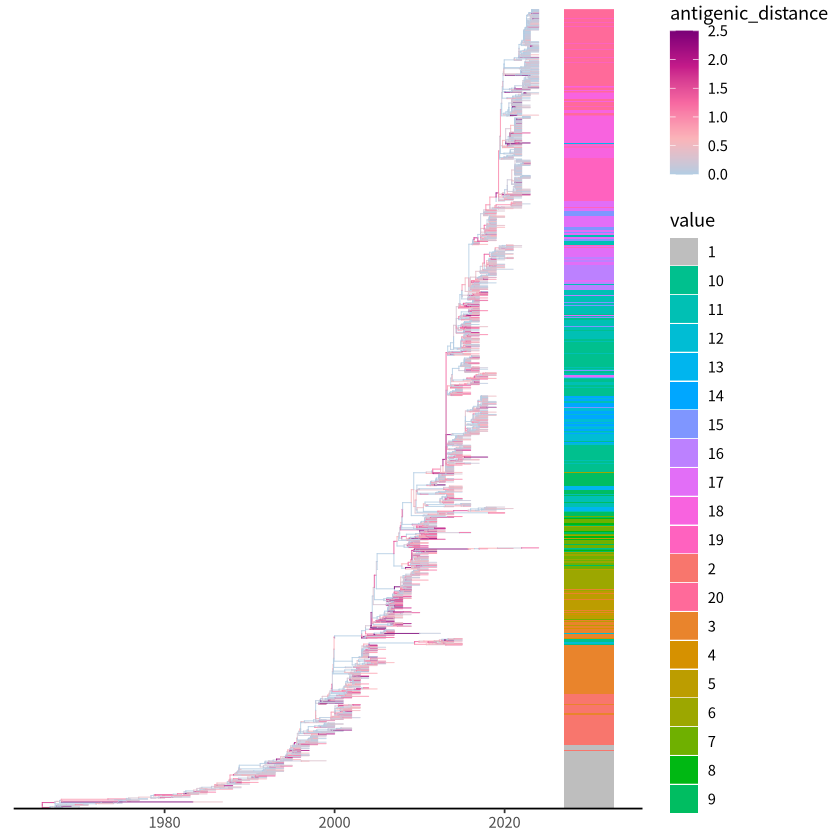

In [26]:
p1 <- gheatmap(p, 
               PLANT_metacluster, 
               offset = 0.1, 
               width = 0.1, 
               colnames=FALSE,
               color = NA,
               legend_title="metacluster") +
  scale_fill_manual(values = my_colors2) +
  theme_tree2()

p1

# Save the plot as svg
# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/antigenic_distance_tree_metacluster_updated_250602.pdf", plot = p1, width = 8, height = 10)
# save the plot as svg
# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/antigenic_distance_tree_metacluster_updated_250602.svg", plot = p1, width = 8, height = 10)

In [27]:
# make a new dataframe PLANT_metacluster3 by making a copy of PLANT_metacluster and adding a new column 'metacluster3' by making values 1 to 5 as mm1, 6 to 9 as mm2, 10 to 17 as mm3, 18 to 20 as mm4
PLANT_metacluster3 <- PLANT_metacluster %>%
  mutate(metacluster3 = case_when(
    metacluster2 %in% c("1") ~ "mm0",
    metacluster2 %in% c("2", "3", "4", "5") ~ "mm1",
    metacluster2 %in% c("6", "7", "8", "9") ~ "mm2",
    metacluster2 %in% c("10", "11", "12", "13", "14", "15", "16", "17") ~ "mm3",
    metacluster2 %in% c("18", "19", "20") ~ "mm4",
    TRUE ~ NA_character_
  )) 
PLANT_metacluster3$metacluster3 <- as.factor(PLANT_metacluster3$metacluster3)
PLANT_metacluster3

metacluster2 metacluster3
NODE_0000001 1            mm0         
NODE_0000014 1            mm0         
NODE_0000015 1            mm0         
EPI23772     1            mm0         
EPI23776     1            mm0         
NODE_0000013 1            mm0         
EPI80015     1            mm0         
NODE_0000003 1            mm0         
EPI240955    1            mm0         
EPI159312    1            mm0         
NODE_0000005 1            mm0         
EPI281164    1            mm0         
NODE_0000006 1            mm0         
EPI56904     1            mm0         
EPI23766     1            mm0         
NODE_0000000 1            mm0         
EPI144950    1            mm0         
EPI23858     1            mm0         
NODE_0000002 1            mm0         
EPI449150    1            mm0         
EPI23770     1            mm0         
NODE_0000012 1            mm0         
EPI131276    1            mm0         
NODE_0000009 1            mm0         
EPI92074     1            mm0         
NODE_0000010 1            mm0         
EPI91884     1            mm0         
NODE_0000011 1            mm0         
EPI362414    1            mm0         
EPI118982    1            mm0         
⋮            ⋮            ⋮           
NODE_0002165 20           mm4         
NODE_0002727 20           mm4         
EPI3457961   20           mm4         
EPI3233111   20           mm4         
EPI3414914   19           mm4         
NODE_0002167 20           mm4         
EPI3460071   20           mm4         
NODE_0002169 20           mm4         
EPI3424235   20           mm4         
NODE_0002170 20           mm4         
EPI3193451   19           mm4         
NODE_0002171 20           mm4         
EPI3295244   20           mm4         
NODE_0002172 20           mm4         
EPI3431740   20           mm4         
NODE_0002173 20           mm4         
EPI3502331   20           mm4         
NODE_0002174 20           mm4         
EPI3373078   20           mm4         
NODE_0002176 20           mm4         
EPI3158186   20           mm4         
NODE_0002177 20           mm4         
EPI3434522   20           mm4         
NODE_0002178 20           mm4         
EPI3236171   20           mm4         
NODE_0002179 20           mm4         
EPI3230986   20           mm4         
NODE_0002180 20           mm4         
EPI3217549   20           mm4         
EPI3127362   20           mm4

In [28]:
my_colors3 <- c(
  "1"  = "gray", 
  "2"  = "#F8766D", 
  "3"  = "#E9842C",
  "4"  = "#D69100",
  "5"  = "#BC9D00",
  "6"  = "#9CA700",
  "7"  = "#6FB000",
  "8"  = "#00B813",
  "9"  = "#00BD61",
  "10" = "#00C08E",
  "11" = "#00C0B4",
  "12" = "#00BDD4",
  "13" = "#00B5EE",
  "14" = "#00A7FF",
  "15" = "#7F96FF",
  "16" = "#BC81FF",
  "17" = "#E26EF7",
  "18" = "#F863DF",
  "19" = "#FF62BF",
  "20" = "#FF6A9A",
  "mm0" = "gray",
  "mm1" = "#f9a63a",
  "mm2" = "#86956e",
  "mm3" = "#588c92",
  "mm4" = "#ca69a1"
)


Warning message:
“attributes are not identical across measure variables; they will be dropped”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


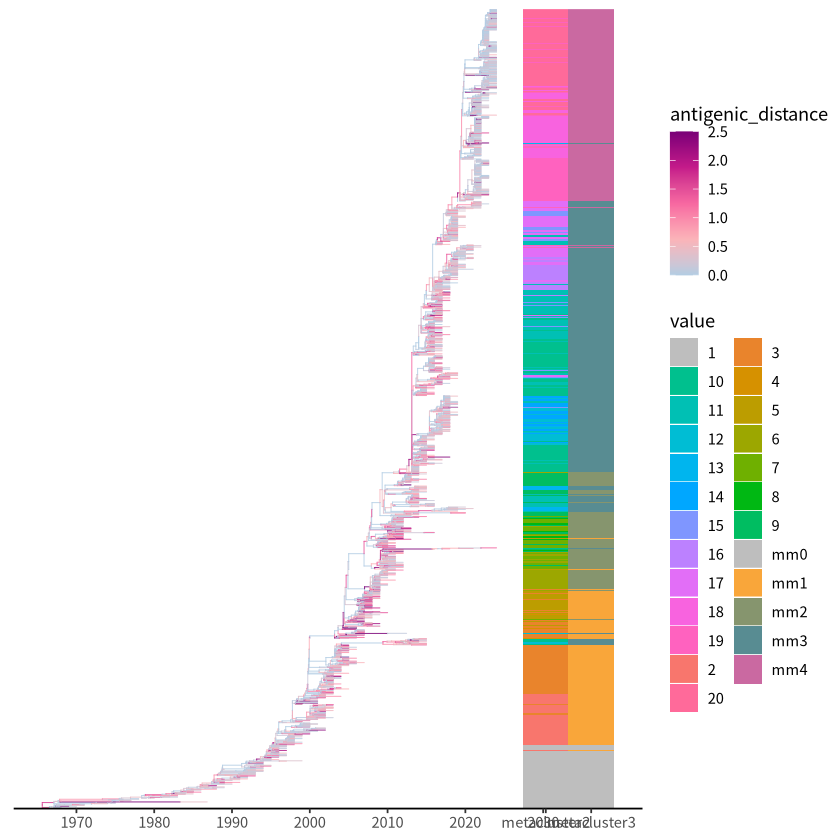

In [29]:
p2 <- gheatmap(p, 
               PLANT_metacluster3, 
               offset = 0.5, 
               width = 0.2, 
               colnames=FALSE,
               color = NA,
              #  colnames_angle = -45,
               legend_title="metacluster") +
  scale_fill_manual(values = my_colors3) +
  scale_x_ggtree()

p2

In [30]:
# annotate with the shift node of antigenic change
antig_shift_nodes <- read.csv('/data1/shusuke/Cartography/For_paper_250401/Fig_3/antig_shift_node_10descendant.csv')
antig_shift_nodes <- as.vector(antig_shift_nodes$child)
antig_shift_nodes

[1] "NODE_0000016" "NODE_0000176" "NODE_0000230" "NODE_0000599" "NODE_0000643"
 [6] "NODE_0000766" "NODE_0000902" "NODE_0000869" "NODE_0001176" "NODE_0001212"
[11] "NODE_0001958" "NODE_0002094"

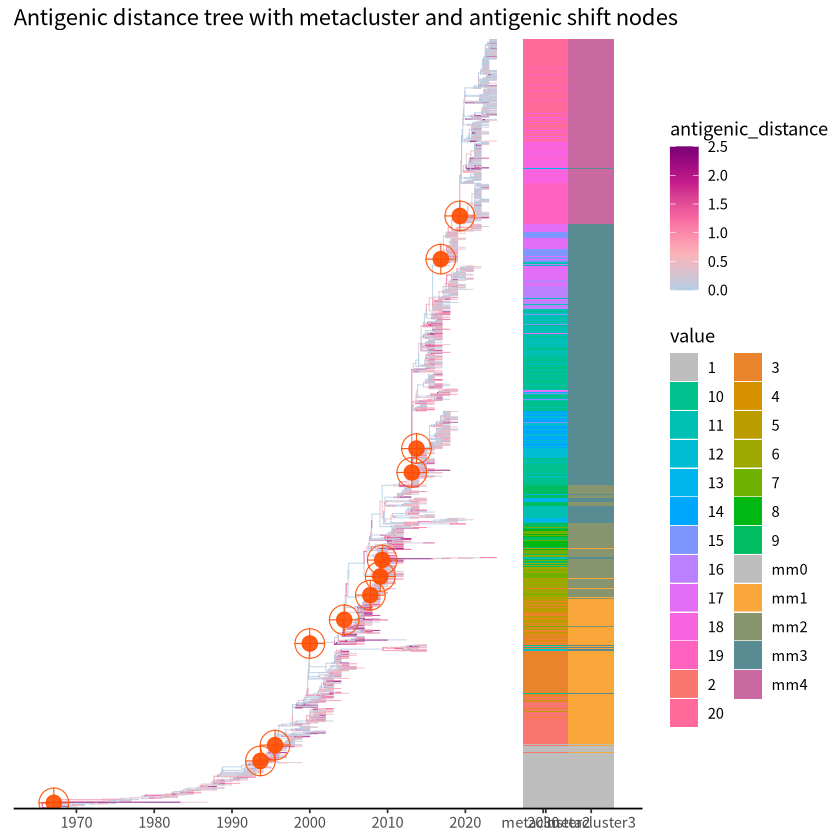

In [31]:
p3 <- p2 +
    geom_point(data = filter(p2$data, label %in% antig_shift_nodes), 
    aes(x = x, y = y), size = 8, shape = 10, color = '#ff4d00', alpha = 0.9) +
    geom_point(data = filter(p2$data, label %in% antig_shift_nodes), 
    aes(x = x, y = y), size = 4, shape = 19, color = '#ff4d00', alpha = 0.9) +
    ggtitle("Antigenic distance tree with metacluster and antigenic shift nodes")
p3

In [56]:
ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/antigenic_distance_tree_metacluster_v8_250708_metametametacluster.pdf", plot = p3, width = 8, height = 10)

In [32]:
tree_annot

'treedata' S4 object'.

...@ phylo:

Phylogenetic tree with 2703 tips and 1769 internal nodes.

Tip labels:
  EPI23772, EPI23776, EPI240955, EPI159312, EPI281164, EPI56904, ...
Node labels:
  , NODE_0000014, NODE_0000015, NODE_0000013, NODE_0000003, NODE_0000005, ...

Rooted; includes branch length(s).

with the following features available:
  '', 'date', 'numdate', 'seq', 'z1', 'z2', 'z3', 'metacluster',
'metacluster2', 'antigenic_distance', 'cumulative_antigenic_distance',
'geodesic_distance_from_root_at_childnode',
'geodesic_distance_from_root_delta', 'child_year'.

# The associated data tibble abstraction: 4,472 × 16
# The 'node', 'label' and 'isTip' are from the phylo tree.
    node label     isTip date       numdate seq       z1    z2    z3 metacluster
   <int> <chr>     <lgl> <chr>        <dbl> <chr>  <dbl> <dbl> <dbl>       <dbl>
 1     1 EPI23772  TRUE  1971-01-01    1971 QDLPG…  5.27 -8.34  5.90          20
 2     2 EPI23776  TRUE  1972-01-01    1972 QDLPG…  5.12 -8.26  5.90 

#### import backbone tree

In [33]:
tree_backbone_path <- '/data1/shusuke/Cartography/For_paper_250401/Fig_3/timetree_backbone_pruned_lessthan_10tips_updated.nwk'
tree_backbone <- read.tree(tree_backbone_path)

In [34]:
# make a new column 'label' from index name of PLANT_metacluster
PLANT_metacluster3$label <- rownames(PLANT_metacluster3)

In [35]:
antig_backbone_manifold <- read.csv("/data1/shusuke/Cartography/For_paper_250401/Fig_3/antigenic_distance_in_manifold_space_backbone_pruned_lessthan10tips_updated.csv")

In [36]:
# left join the two dataframes by 'label'
antig_backbone_manifold_metacluster <- antig_backbone_manifold %>%
  left_join(PLANT_metacluster3, by = "label")

In [37]:
tree_backbone_annot <- full_join(tree_backbone, antig_backbone_manifold_metacluster, by = "label")

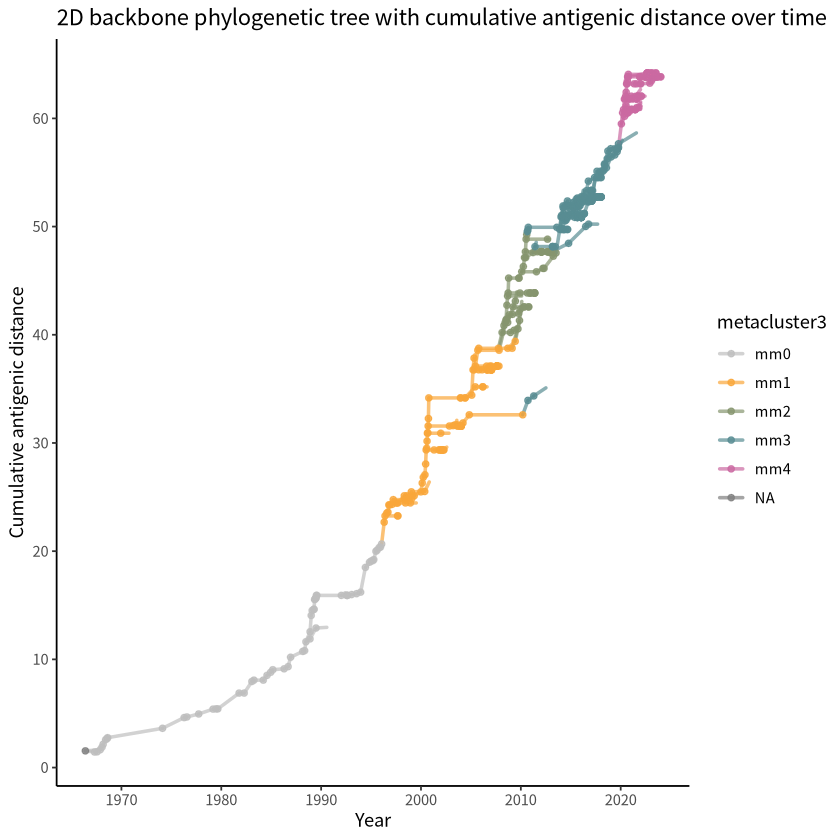

In [38]:
p_backbone_2D <- ggtree(tree_backbone_annot, aes(color=metacluster3), mrsd = '2024-01-01', yscale = "cumulative_antigenic_distance_at_childnode", size = 1, alpha = 0.7) + 
    theme_classic() +
    geom_nodepoint(aes(color = metacluster3), size = 1.5, alpha = 0.8) +
    scale_color_manual(values = my_colors3) +
    scale_x_continuous(breaks = seq(1960, 2024, by = 10)) +
    scale_y_continuous(breaks = seq(0, 80, by = 10)) +
    labs(title = "2D backbone phylogenetic tree with cumulative antigenic distance over time",
         x = "Year",
         y = "Cumulative antigenic distance")

p_backbone_2D

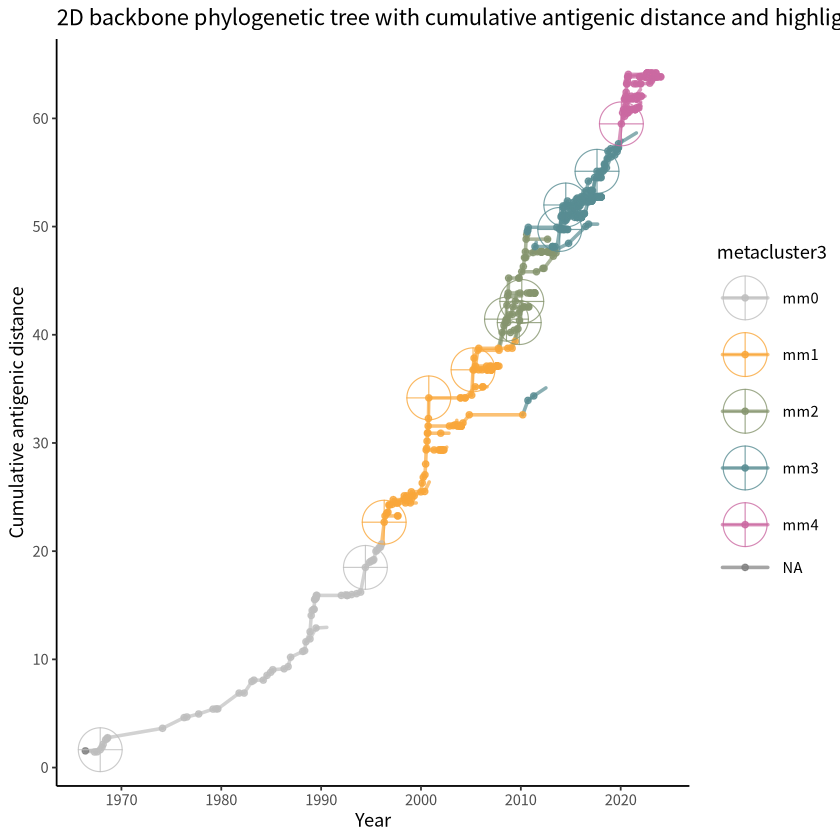

In [39]:
p2_backbone_2D <- p_backbone_2D + 
    geom_point(data = filter(p_backbone_2D$data, label %in% antig_shift_nodes), 
    aes(x = x, y = y), size = 12, shape = 10, fill = '#2700D1FF',  alpha = 0.8) + #color = '#ff4d00',
    #scale_color_manual(values = my_colors2) +
    labs(title = "2D backbone phylogenetic tree with cumulative antigenic distance and highlighted nodes")
p2_backbone_2D

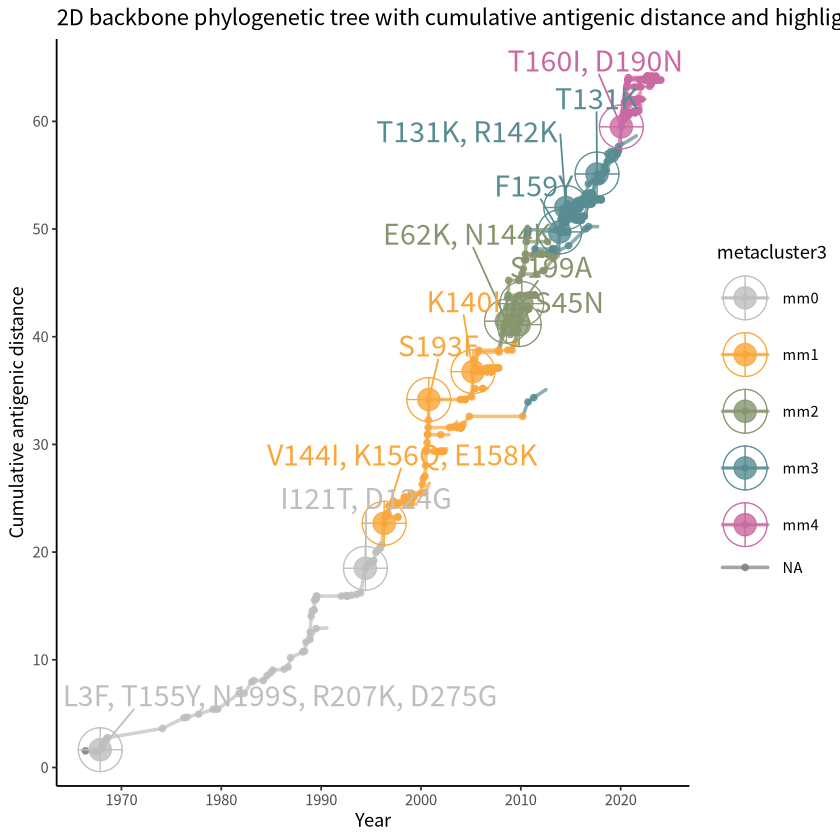

In [40]:
library(ggrepel)

p3_backbone_2D <- p2_backbone_2D + 
    geom_point(data = filter(p2_backbone_2D$data, label %in% antig_shift_nodes), 
    aes(x = x, y = y), size = 12, shape = 10, fill = '#2700D1FF', alpha = 0.8) +
    geom_point(data = filter(p2_backbone_2D$data, label %in% antig_shift_nodes), 
    aes(x = x, y = y), size = 6, shape = 19, fill = '#2700D1FF', alpha = 0.8) +
    geom_text_repel(data = filter(p2_backbone_2D$data, label %in% antig_shift_nodes), 
    aes(x = x, y = y, label = mutations), size = 6, nudge_x = 1, nudge_y = 5, force = 50, show.legend = FALSE) +
    theme_classic() 
    # theme(legend.position="none", panel.grid.major = element_line(color = "gray80"))
p3_backbone_2D


# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_with_cumulative_antigenic_change_backbone_pruned_lessthan_10tips_with_branchcolor_clustershift_and_mutation_updated_250604.pdf", plot = p3_backbone_2D, width = 16, height = 10)
# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_with_cumulative_antigenic_change_backbone_pruned_lessthan_10tips_with_branchcolor_clustershift_and_mutation_updated_250604.svg", plot = p3_backbone_2D, width = 16, height = 10)

In [41]:
# extract tree info
tree_data <- p_backbone_2D$data

# # merge with metadata
# tree_data <- tree_data %>%
#   left_join(as.data.frame(tree_backbone_annot@extraInfo), by = "node") 
head(tree_data)

parent node branch.length label        mutations  antigenic_distance
1  78    1    0.34486       NODE_0000003 N31D, G78V 0.24124062        
2 107    2    1.07934       NODE_0000112 N193S      0.06101979        
3 119    3    0.37178       NODE_0000154 S219F      0.24551175        
4 139    4    0.01177       NODE_0000216            0.00000000        
5 147    5    0.09557       NODE_0000295 H33N       0.05384622        
6 149    6    0.57901       NODE_0000269            0.00000000        
  cumulative_antigenic_distance_at_childnode geodesic_distance_from_root
1  1.696119                                   1.635921                  
2 12.958385                                   8.203653                  
3 16.158063                                   7.184936                  
4 23.261525                                  12.667814                  
5 25.176581                                  14.134863                  
6 24.456371                                  13.549437                  
  geodesic_distance_from_root_delta child_year isUp_or_down_or_same
1  0.18185870                       1967       up                  
2 -0.02149608                       1989       down                
3 -0.06193075                       1991       down                
4  0.00000000                       1996       same                
5 -0.02078906                       1997       down                
6  0.00000000                       1998       same                
  numeric_date metacluster2 metacluster3 isTip x        y         branch  
1 1967.131     1            mm0          TRUE  1967.913  1.696119 1967.741
2 1989.785     1            mm0          TRUE  1990.566 12.958385 1990.027
3 1991.614     1            mm0          TRUE  1992.396 16.158063 1992.210
4 1996.916     2            mm1          TRUE  1997.698 23.261525 1997.692
5 1997.900     2            mm1          TRUE  1998.682 25.176581 1998.634
6 1998.739     2            mm1          TRUE  1999.521 24.456371 1999.232
  angle     branch.y
1   0.00000 1.000000
2   0.00000 2.000000
3 -68.69192 3.612192
4   0.00000 4.000000
5   0.00000 5.000000
6   0.00000 6.000000

In [42]:
# 
heatmap_data <- tree_data %>%
  filter(!is.na(metacluster3)) %>%
  mutate(
    ymin = max(tree_data$y, na.rm = TRUE) + 5,    # 系統樹より少し上
    ymax = max(tree_data$y, na.rm = TRUE) + 8
  )
head(heatmap_data)

parent node branch.length label        mutations  antigenic_distance
1  78    1    0.34486       NODE_0000003 N31D, G78V 0.24124062        
2 107    2    1.07934       NODE_0000112 N193S      0.06101979        
3 119    3    0.37178       NODE_0000154 S219F      0.24551175        
4 139    4    0.01177       NODE_0000216            0.00000000        
5 147    5    0.09557       NODE_0000295 H33N       0.05384622        
6 149    6    0.57901       NODE_0000269            0.00000000        
  cumulative_antigenic_distance_at_childnode geodesic_distance_from_root
1  1.696119                                   1.635921                  
2 12.958385                                   8.203653                  
3 16.158063                                   7.184936                  
4 23.261525                                  12.667814                  
5 25.176581                                  14.134863                  
6 24.456371                                  13.549437                  
  geodesic_distance_from_root_delta child_year ⋯ metacluster2 metacluster3
1  0.18185870                       1967       ⋯ 1            mm0         
2 -0.02149608                       1989       ⋯ 1            mm0         
3 -0.06193075                       1991       ⋯ 1            mm0         
4  0.00000000                       1996       ⋯ 2            mm1         
5 -0.02078906                       1997       ⋯ 2            mm1         
6  0.00000000                       1998       ⋯ 2            mm1         
  isTip x        y         branch   angle     branch.y ymin     ymax    
1 TRUE  1967.913  1.696119 1967.741   0.00000 1.000000 69.19707 72.19707
2 TRUE  1990.566 12.958385 1990.027   0.00000 2.000000 69.19707 72.19707
3 TRUE  1992.396 16.158063 1992.210 -68.69192 3.612192 69.19707 72.19707
4 TRUE  1997.698 23.261525 1997.692   0.00000 4.000000 69.19707 72.19707
5 TRUE  1998.682 25.176581 1998.634   0.00000 5.000000 69.19707 72.19707
6 TRUE  1999.521 24.456371 1999.232   0.00000 6.000000 69.19707 72.19707

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


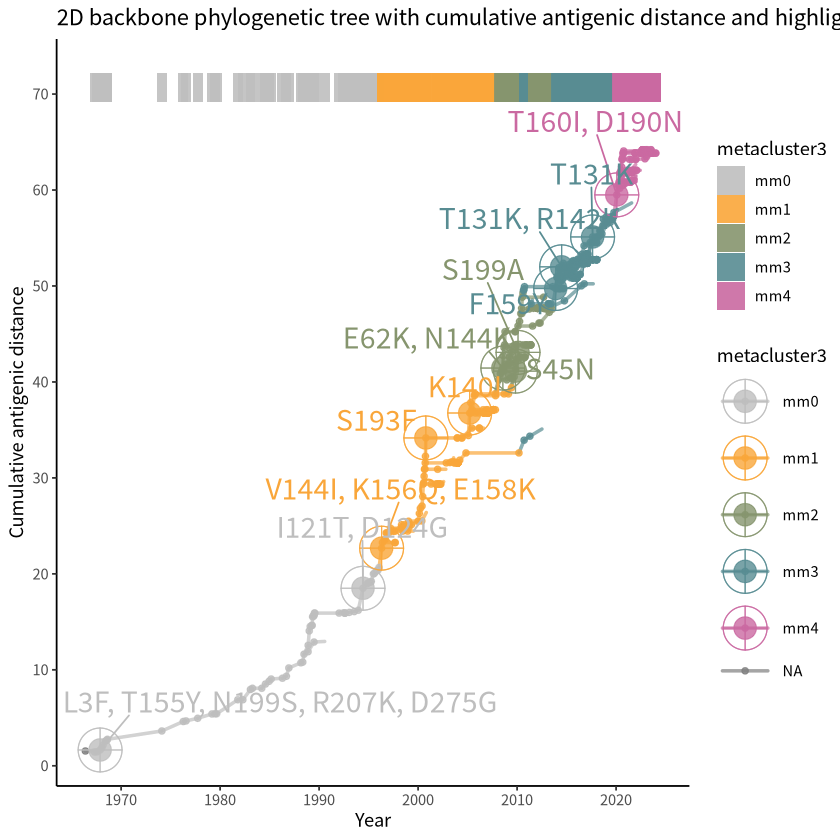

In [43]:
library(ggnewscale)
# color for heatmap
heatmap_colors <- c("mm0" = "gray", "mm1" = "#f9a63a", "mm2" = "#86956e", "mm3" = "#588c92", 'mm4' = "#ca69a1")  # 例

# Add heatmap to the backbone phylogenetic tree
p4_backbone_2D <- p3_backbone_2D +
  new_scale_fill() +
  geom_rect(data = heatmap_data,
            aes(xmin = x - 0.5, xmax = x + 0.5, ymin = ymin, ymax = ymax, fill = metacluster3),
            color = "NA", size = 0.1, alpha = 0.9) +
  scale_fill_manual(values = heatmap_colors, name = "metacluster3") +
  # coord_cartesian(ylim = c(min(tree_data$y), max(tree_data$y) + 10)) +
  theme(legend.position = "right")


p4_backbone_2D

In [ ]:
# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_cumulative_backbonelessthan_10tips_with_clustershift_metametaheatmap_250722.pdf", plot = p4_backbone_2D, width = 16, height = 10)

In [44]:
library(patchwork) 
p_tree <- p3_backbone_2D + theme_classic()


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [45]:
str(tree_data) 

tbl_tree [667 × 20] (S3: tbl_tree/tbl_tree/tbl_df/tbl/data.frame)
 $ parent                                    : int [1:667] 78 107 119 139 147 149 158 178 182 188 ...
 $ node                                      : int [1:667] 1 2 3 4 5 6 7 8 9 10 ...
 $ branch.length                             : num [1:667] 0.3449 1.0793 0.3718 0.0118 0.0956 ...
 $ label                                     : chr [1:667] "NODE_0000003" "NODE_0000112" "NODE_0000154" "NODE_0000216" ...
 $ mutations                                 : chr [1:667] "N31D, G78V" "N193S" "S219F" "" ...
 $ antigenic_distance                        : num [1:667] 0.2412 0.061 0.2455 0 0.0538 ...
 $ cumulative_antigenic_distance_at_childnode: num [1:667] 1.7 13 16.2 23.3 25.2 ...
 $ geodesic_distance_from_root               : num [1:667] 1.64 8.2 7.18 12.67 14.13 ...
 $ geodesic_distance_from_root_delta         : num [1:667] 0.1819 -0.0215 -0.0619 0 -0.0208 ...
 $ child_year                                : int [1:667] 1967 1989 1

In [46]:
tree_data$metacluster3[is.na(tree_data$metacluster3)] <- "mm0"

In [47]:
summary(tree_data$x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1966    2007    2015    2012    2020    2024 

In [48]:
levels(tree_data$metacluster3)
names(heatmap_colors)

[1] "mm0" "mm1" "mm2" "mm3" "mm4"

[1] "mm0" "mm1" "mm2" "mm3" "mm4"

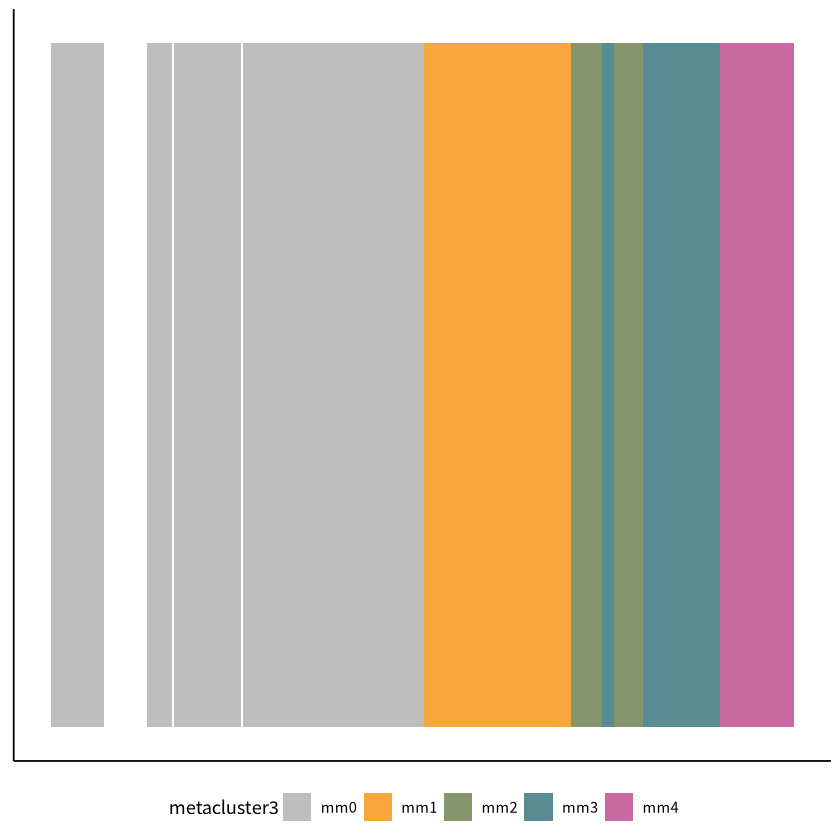

In [49]:
# Convert metacluster3 to a factor with specific levels
tree_data$metacluster3 <- factor(tree_data$metacluster3, levels = c("mm0", "mm1", "mm2", "mm3", "mm4"))

# tree_data$y_dummy <- factor("")


p_heatmap <- ggplot(tree_data, aes(x = x, y = 1, fill = metacluster3)) +
  geom_tile(width = 2) +
  scale_fill_manual(values = heatmap_colors, name = "metacluster3") +
  theme_classic() +
  theme(
    axis.text.y = element_blank(),
    axis.title.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.ticks.x = element_blank(),
    legend.position = "bottom"
  )
p_heatmap

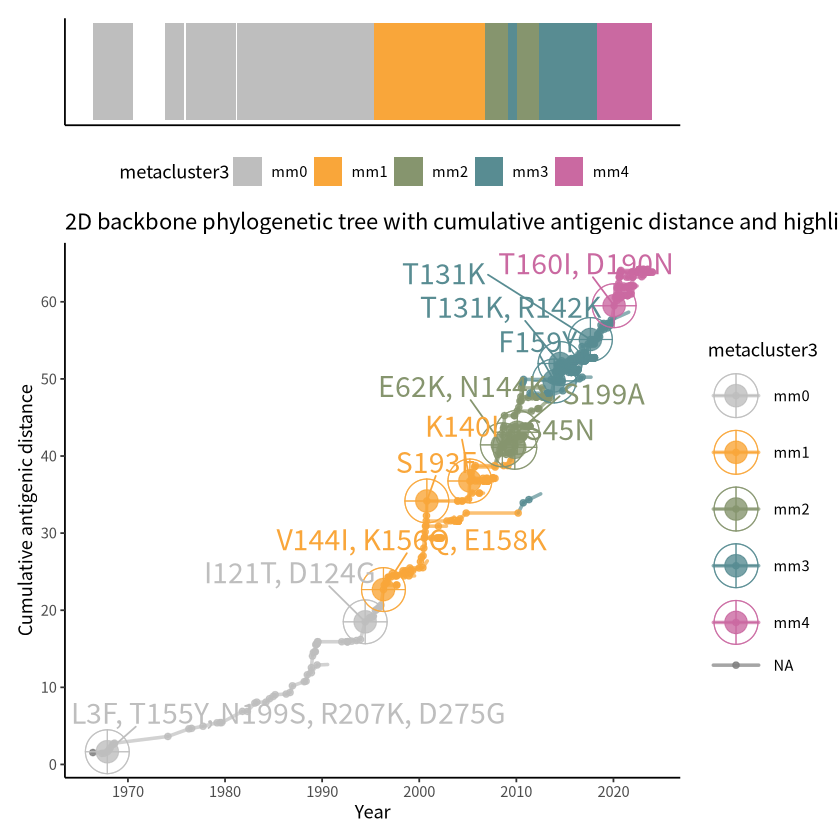

In [50]:
final_plot <- p_heatmap / p_tree + plot_layout(heights = c(1, 5))
final_plot

In [97]:
ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_cumulative_backbonelessthan_10tips_with_clustershift_metametaheatmap_v3_250722.pdf", plot = final_plot, width = 16, height = 10)

In [51]:
# calculate the slope of cumulative antigenic distance vs geodesic distance from root at childnode
# extract the year and cumulative antigenic distance from the tree data
df_reg <- p3_backbone_2D$data %>% 
  dplyr::select(x, y) %>% 
  dplyr::filter(!is.na(x) & !is.na(y))

# fit a linear regression model
lm_model <- lm(y ~ x, data = df_reg)

# extract the confidence interval for the slope
ci <- confint(lm_model, "x", level = 0.95)

# extract the lower and upper bounds of the confidence interval
slope_lower <- ci[1]
slope_upper <- ci[2]

# extract the slope and intercept
slope <- coef(lm_model)["x"]
intercept <- coef(lm_model)["(Intercept)"]
slope_label <- sprintf("Slope: %.2f antigenic distance / year", slope)
slope_label

[1] "Slope: 1.38 antigenic distance / year"

In [52]:
slope_lower

[1] 1.359861

In [53]:
slope_upper

[1] 1.402079

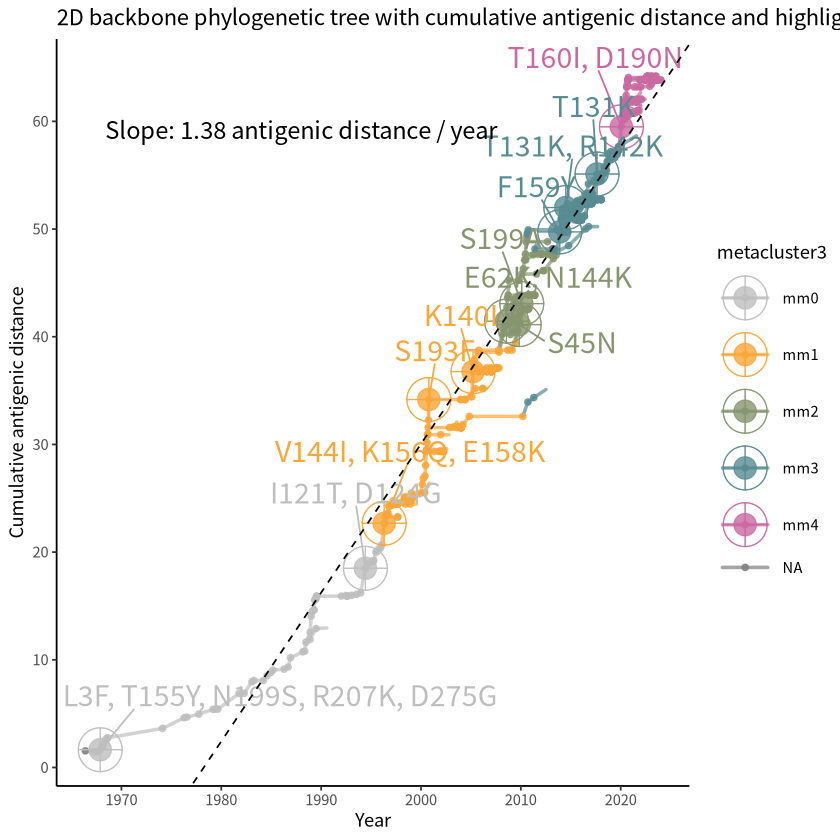

In [54]:
# add the slope line to the plot
p4_backbone_2D <- p3_backbone_2D +
  geom_abline(slope = slope, intercept = intercept, color = "black", linetype = "dashed", size = 0.5) +
  annotate("text", x = min(df_reg$x) + 2, y = max(df_reg$y) - 5, 
           label = slope_label, hjust = 0, size = 5, )

p4_backbone_2D

# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_with_cumulative_antigenic_change_backbone_pruned_lessthan_10tips_with_branchcolor_clustershift_and_mutation_updated_slope_250604.pdf", plot = p4_backbone_2D, width = 16, height = 8)
# ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_with_cumulative_antigenic_change_backbone_pruned_lessthan_10tips_with_branchcolor_clustershift_and_mutation_updated_slope_250604.svg", plot = p4_backbone_2D, width = 16, height = 8)

In [55]:
p_tree <- p4_backbone_2D + theme_classic()

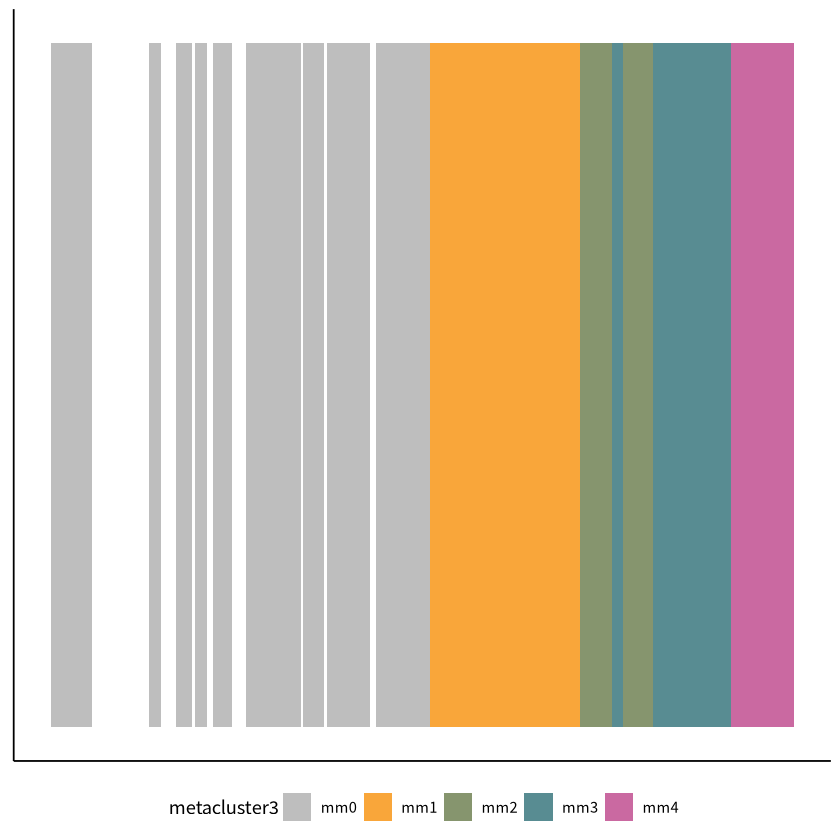

In [56]:
# set the order of metacluster3 factor levels
tree_data$metacluster3 <- factor(tree_data$metacluster3, levels = c("mm0", "mm1", "mm2", "mm3", "mm4"))

# tree_data$y_dummy <- factor("")

p_heatmap <- ggplot(tree_data, aes(x = x, y = 1, fill = metacluster3)) +
  geom_tile(width = 1) +
  scale_fill_manual(values = heatmap_colors, name = "metacluster3") +
  theme_classic() +
  theme(
    axis.text.y = element_blank(),
    axis.title.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.ticks.x = element_blank(),
    legend.position = "bottom"
  )
p_heatmap

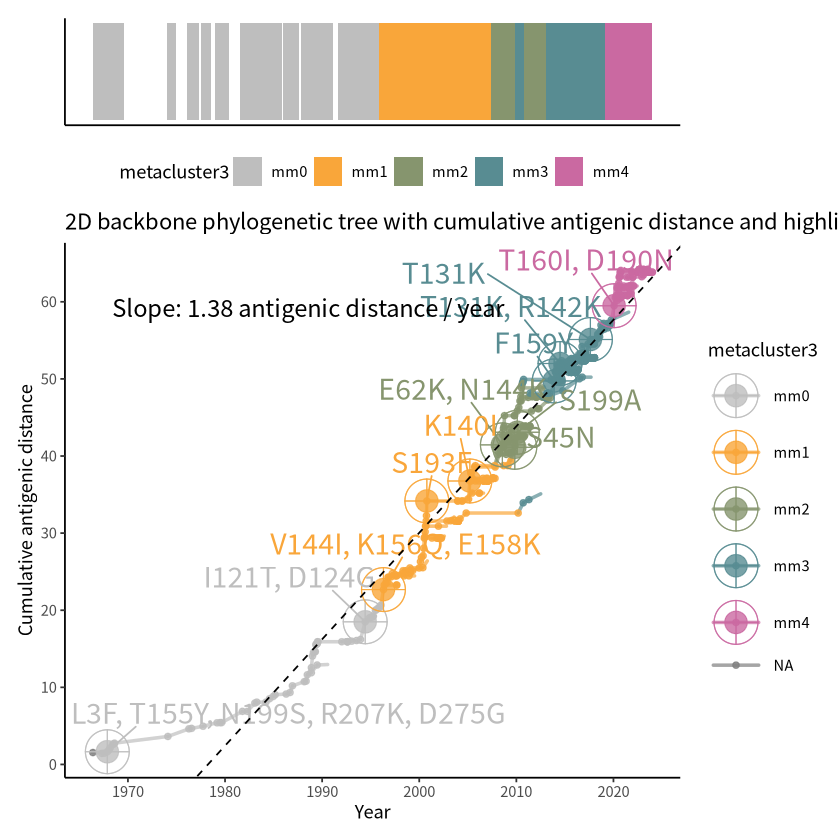

In [57]:
tree_with_heatmap <- p_heatmap / p_tree + plot_layout(heights = c(1, 5))
tree_with_heatmap

In [105]:
ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_cumulative_backbonelessthan_10tips_with_clustershift_metametaheatmap_v5_250722.pdf", plot = tree_with_heatmap, width = 16, height = 10)

In [58]:
# calculate the slope of cumulative antigenic distance vs geodesic distance from root at childnode
df_reg <- p3_backbone_2D$data %>% 
  dplyr::select(x, y) %>% 
  dplyr::filter(!is.na(x) & !is.na(y))

# set the center years for segment regression
center_years <- c(2009, 2013, 2019)

# initialize lists to store segment lines and slope labels
segment_lines <- list()
slope_labels <- list()

for (year_center in center_years) {
  year_min <- year_center 
  year_max <- year_center + 1.5

  df_segment <- df_reg %>% filter(x >= year_min, x <= year_max)

  if (nrow(df_segment) >= 2) {
    lm_segment <- lm(y ~ x, data = df_segment)

    slope_seg <- coef(lm_segment)["x"]
    intercept_seg <- coef(lm_segment)["(Intercept)"]

    # extract the confidence interval for the slope
    ci <- confint(lm_segment, "x", level = 0.95)
    slope_lower <- ci[1]
    slope_upper <- ci[2]

    x_vals <- c(year_min, year_max)
    y_vals <- slope_seg * x_vals + intercept_seg

    segment_lines[[as.character(year_center)]] <- data.frame(
      x = x_vals,
      y = y_vals,
      group = paste0("window_", year_center),
      slope_label = sprintf("Slope: %.2f", slope_seg),
      x_label = year_min + 0.3,
      y_label = max(y_vals) + 2
    )

    # label for the slope
    slope_labels[[as.character(year_center)]] <- data.frame(
      x = year_min + 0.5,
      y = max(y_vals) + 1,
      label = sprintf("Slope (@%d): %.2f [%.2f, %.2f]", 
                      year_center, slope_seg, slope_lower, slope_upper)
    )
  }
}

# Combine into data frames
df_lines <- bind_rows(segment_lines)
df_labels <- bind_rows(slope_labels)
df_labels$label

[1] "Slope (@2009): 3.20 [0.28, 6.12]" "Slope (@2013): 2.34 [1.83, 2.86]"
[3] "Slope (@2019): 3.89 [2.87, 4.91]"

In [59]:
df_labels

x      y        label                           
1 2009.5 45.75416 Slope (@2009): 3.20 [0.28, 6.12]
2 2013.5 52.09271 Slope (@2013): 2.34 [1.83, 2.86]
3 2019.5 62.02216 Slope (@2019): 3.89 [2.87, 4.91]

In [60]:
library(lubridate)
library(dplyr)

# Create regression windows
regression_windows <- tibble(
  start_date = as.Date(c("2009-09-01", "2013-02-01", "2019-09-01")),
  end_date   = as.Date(c("2011-01-31", "2014-08-31", "2021-01-31"))
) %>%
  mutate(
    xmin = year(start_date) + (month(start_date) - 1) / 12,
    xmax = year(end_date) + (month(end_date) - 1) / 12
  )


Attaching package: ‘lubridate’


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [61]:
regression_windows 

start_date end_date   xmin     xmax    
1 2009-09-01 2011-01-31 2009.667 2011.000
2 2013-02-01 2014-08-31 2013.083 2014.583
3 2019-09-01 2021-01-31 2019.667 2021.000

In [62]:
# regression
df_reg <- p3_backbone_2D$data %>% 
  select(x, y) %>% 
  filter(!is.na(x) & !is.na(y))

segment_lines <- list()
slope_labels <- list()

for (i in seq_len(nrow(regression_windows))) {
  year_min <- regression_windows$xmin[i]
  year_max <- regression_windows$xmax[i]

  df_segment <- df_reg %>% filter(x >= year_min, x <= year_max)

  if (nrow(df_segment) >= 2) {
    lm_segment <- lm(y ~ x, data = df_segment)

    slope_seg <- coef(lm_segment)["x"]
    intercept_seg <- coef(lm_segment)["(Intercept)"]

    ci <- confint(lm_segment, "x", level = 0.95)
    slope_lower <- ci[1]
    slope_upper <- ci[2]

    x_vals <- c(year_min, year_max)
    y_vals <- slope_seg * x_vals + intercept_seg

    segment_lines[[i]] <- data.frame(
      x = x_vals,
      y = y_vals,
      group = paste0("window_", i),
      slope_label = sprintf("Slope: %.2f", slope_seg),
      x_label = year_min + 0.3,
      y_label = max(y_vals) + 2
    )

    # label for the slope
    slope_labels[[i]] <- data.frame(
      x = year_min + 0.5,
      y = max(y_vals) + 1,
      label = sprintf("Slope (%.1f–%.1f): %.2f [%.2f, %.2f]", 
                      year_min, year_max, slope_seg, slope_lower, slope_upper)
    )
  }
}

# Combine into data frames
df_lines <- bind_rows(segment_lines)
df_labels <- bind_rows(slope_labels)

In [63]:
df_labels

x        y        label                                    
1 2010.167 46.41287 Slope (2009.7–2011.0): 2.22 [-1.38, 5.82]
2 2013.583 52.32373 Slope (2013.1–2014.6): 2.39 [1.66, 3.12] 
3 2020.167 64.68972 Slope (2019.7–2021.0): 4.82 [3.86, 5.77]

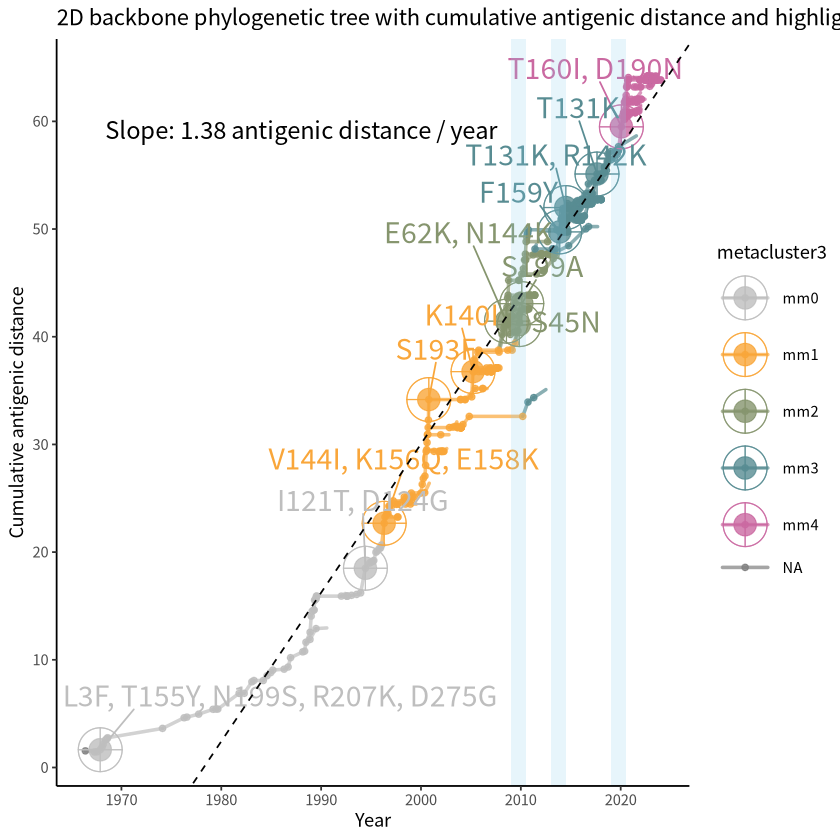

In [64]:
# set time range for the highlight windows
highlight_windows <- data.frame(
  xmin = c(2009, 2013, 2019),
  xmax = c(2009 + 1.5, 2013 + 1.5, 2019 + 1.5)
)

# add background rectangles to the plot
p6_backbone_2D <- p4_backbone_2D +  
  geom_rect(data = highlight_windows,
            aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf),
            inherit.aes = FALSE,
            fill = "skyblue", alpha = 0.2)


p6_backbone_2D

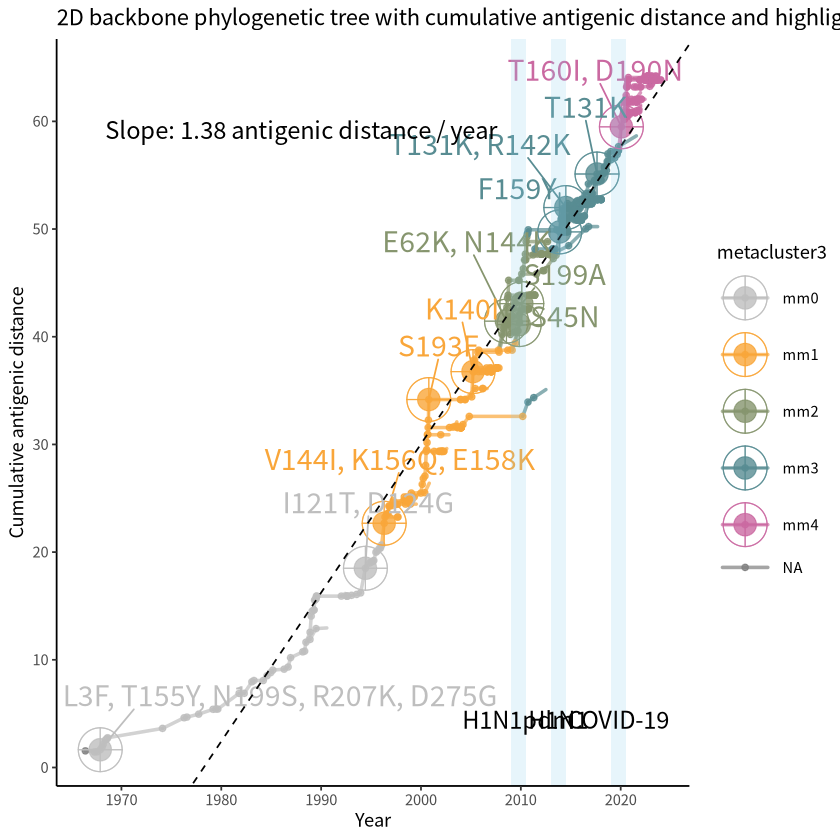

In [65]:
# Add labels to the highlighted windows
highlight_windows <- highlight_windows %>%
  mutate(
    x = (xmin + xmax) / 2,
    y = min(p3_backbone_2D$data$y, na.rm = TRUE) + 3,  
    label = c("H1N1pdm", "H1N1", "COVID-19")
  )

p7_backbone_2D <- p6_backbone_2D +    
  geom_text(data = highlight_windows,
            aes(x = x, y = y, label = label),
            inherit.aes = FALSE,
            size = 5, color = "black")

p7_backbone_2D

In [66]:
# add year to highlight_windows 
highlight_windows <- highlight_windows %>%
  mutate(year = xmin)  


df_labels <- df_labels %>%
  mutate(year = as.numeric(gsub(".*@(\\d+).*", "\\1", label)))  


highlight_windows <- left_join(highlight_windows, df_labels %>% select(year, slope_label = label), by = "year")

# adjust y positions for the labels
highlight_windows <- highlight_windows %>%
  mutate(
    y_main = min(p3_backbone_2D$data$y, na.rm = TRUE) + 3,
    y_slope = min(p3_backbone_2D$data$y, na.rm = TRUE) + 1
  )

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `year = as.numeric(gsub(".*@(\\d+).*", "\\1", label))`.
Caused by warning:
! NAs introduced by coercion”


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”


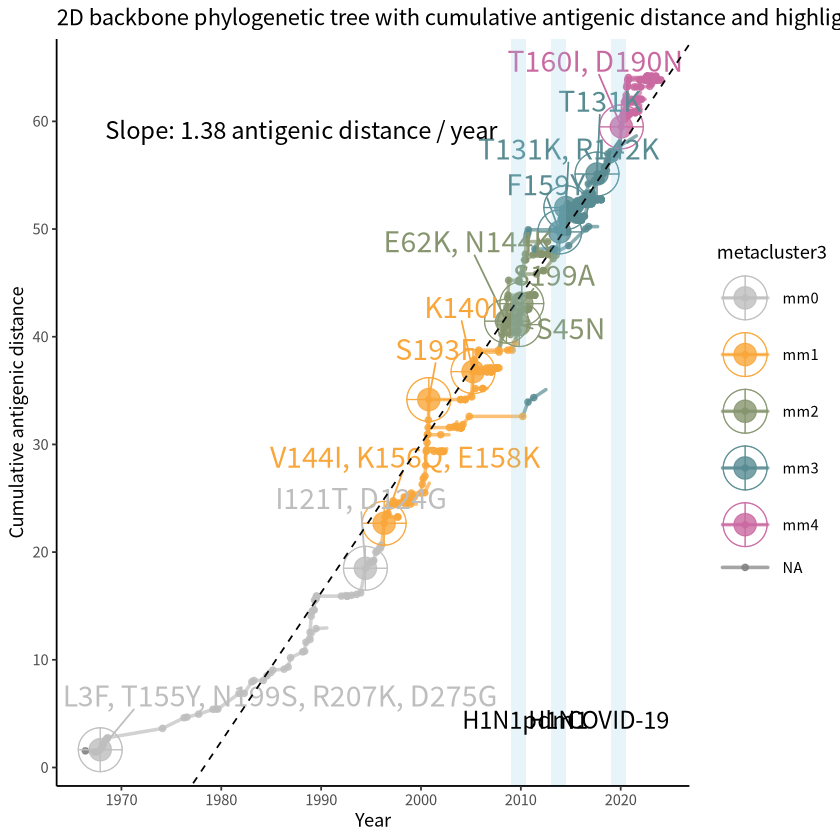

In [67]:
p8_backbone_2D <- p6_backbone_2D +
  
  geom_text(data = highlight_windows,
            aes(x = x, y = y_main, label = label),
            inherit.aes = FALSE,
            size = 5, color = "black") +
  
  geom_text(data = highlight_windows,
            aes(x = x, y = y_slope, label = slope_label),
            inherit.aes = FALSE,
            size = 4, color = "gray30")

p8_backbone_2D

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”


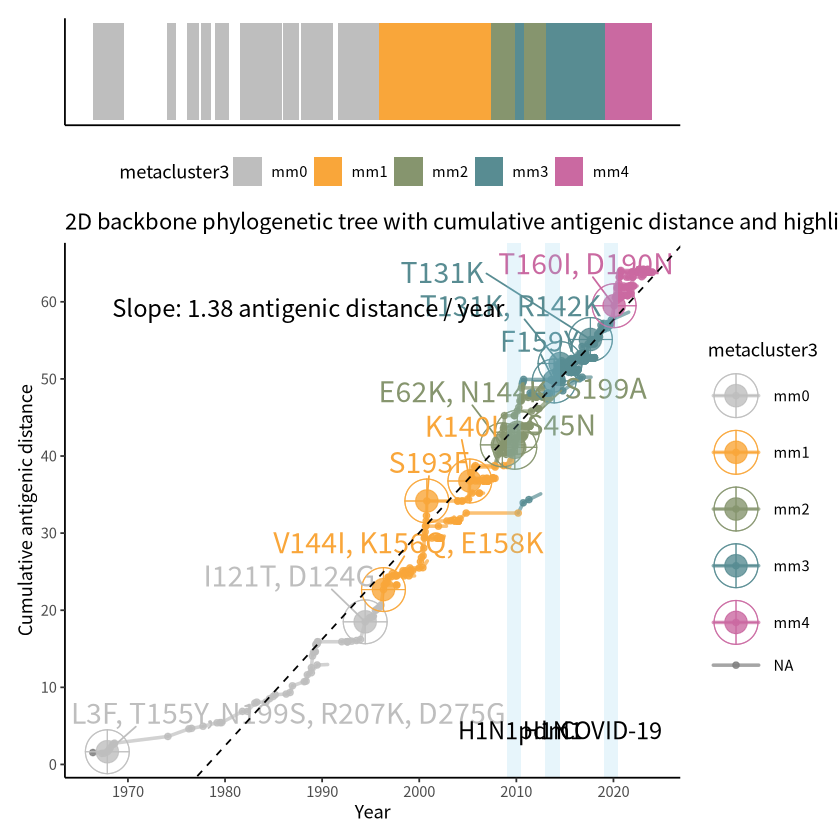

In [68]:
p_tree <- p8_backbone_2D + theme_classic()
tree_with_heatmap <- p_heatmap / p_tree + plot_layout(heights = c(1, 5))
tree_with_heatmap

In [117]:
ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_cumulative_backbonelessthan_10tips_with_clustershift_metametaheatmap_v8_250722.pdf", plot = tree_with_heatmap, width = 16, height = 10)

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”


In [69]:
df_reg_sub <- df_reg %>% filter(x >= 1997)

In [70]:
lm_model_sub <- lm(y ~ x, data = df_reg_sub)


slope_sub <- coef(lm_model_sub)["x"]
intercept_sub <- coef(lm_model_sub)["(Intercept)"]


ci_sub <- confint(lm_model_sub, "x", level = 0.95)
slope_lower_sub <- ci_sub[1]
slope_upper_sub <- ci_sub[2]


slope_label_sub <- sprintf("Slope (≥1997): %.2f [%.2f, %.2f] antigenic distance / year",
                           slope_sub, slope_lower_sub, slope_upper_sub)

In [71]:
slope_label_sub

[1] "Slope (≥1997): 1.61 [1.59, 1.63] antigenic distance / year"

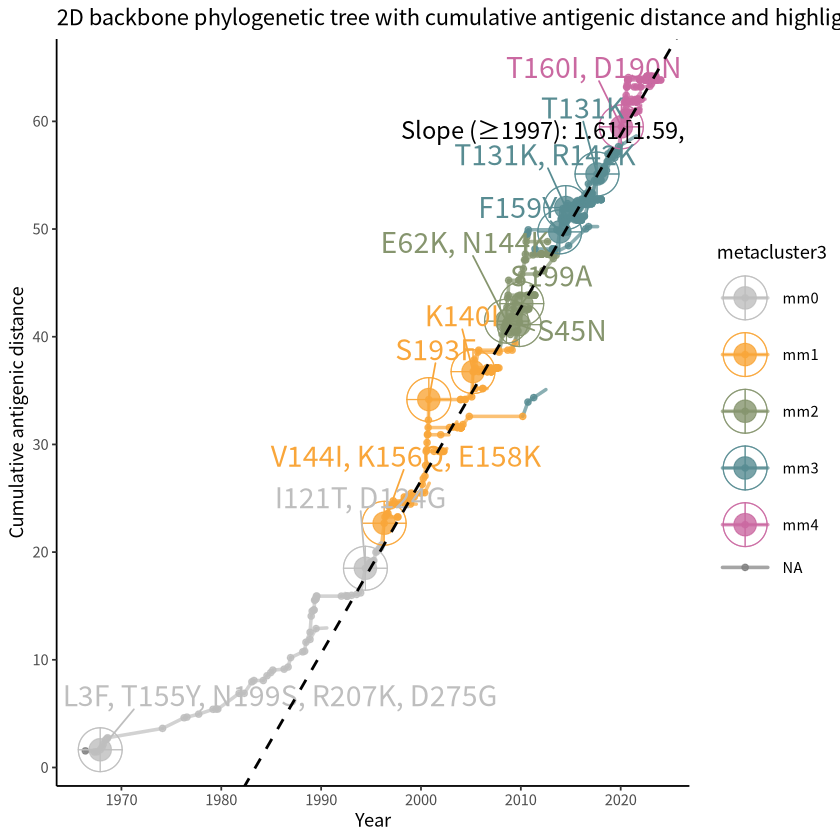

In [72]:
p_sub <- p3_backbone_2D +  
  geom_abline(slope = slope_sub, intercept = intercept_sub,
              color = "black", linetype = "dashed", size = 0.8) +
  annotate("text", x = 1998, y = max(df_reg_sub$y, na.rm = TRUE) - 5,
           label = slope_label_sub, hjust = 0, size = 5, color = "black")

p_sub

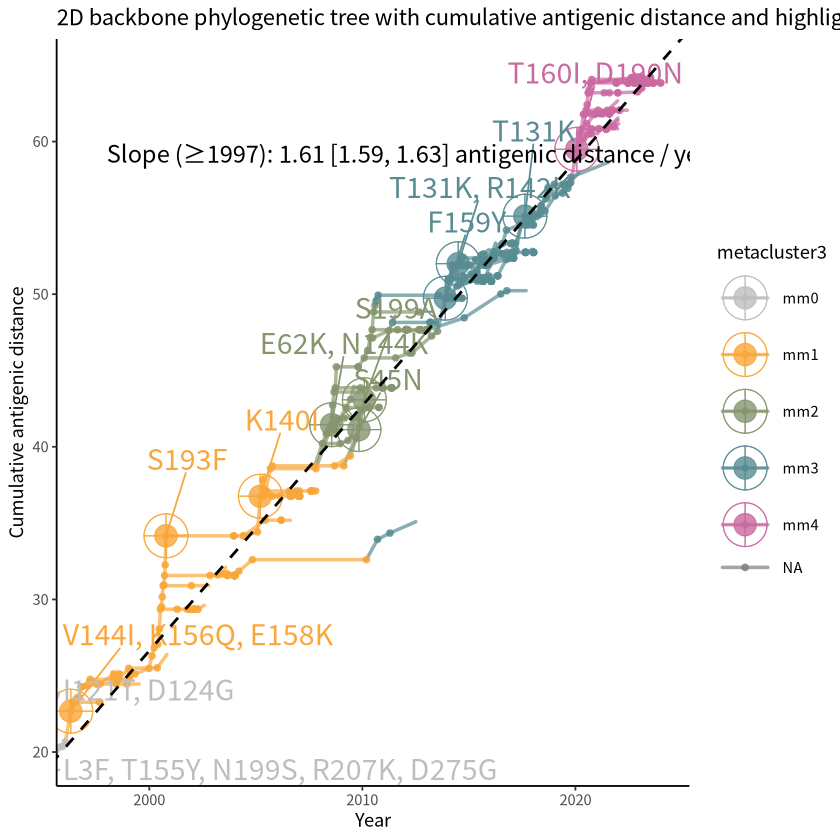

In [73]:
p_post1997 <- p_sub +
  coord_cartesian(xlim = c(1997, NA), ylim = c(20, NA))  

p_post1997

In [75]:
highlight_windows_dates <- tibble(
  start_str = c("2009-09-01", "2013-02-01", "2019-09-01"),
  end_str   = c("2011-01-31", "2014-08-31", "2021-01-31")
) %>%
  mutate(
    start_date = as.Date(start_str),
    end_date = as.Date(end_str),
    
    xmin = year(start_date) + (month(start_date) - 1) / 12,
    xmax = year(end_date) + (month(end_date) - 1) / 12
  )

In [76]:
highlight_windows_dates

start_str  end_str    start_date end_date   xmin     xmax    
1 2009-09-01 2011-01-31 2009-09-01 2011-01-31 2009.667 2011.000
2 2013-02-01 2014-08-31 2013-02-01 2014-08-31 2013.083 2014.583
3 2019-09-01 2021-01-31 2019-09-01 2021-01-31 2019.667 2021.000

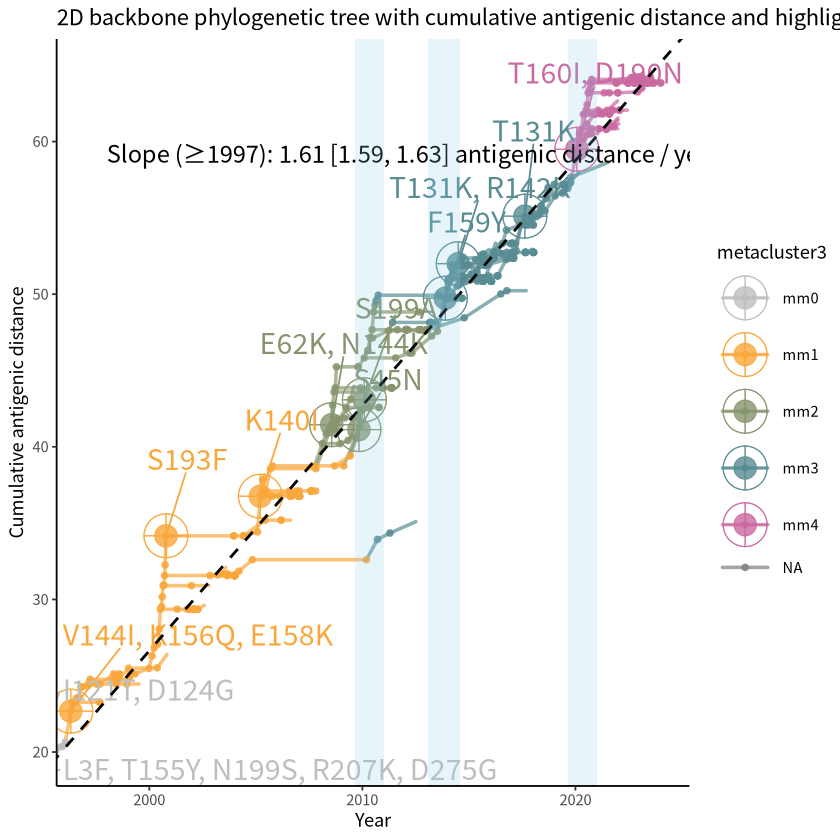

In [77]:
p2_post1997 <- p_post1997 +  
  geom_rect(data = highlight_windows_dates,
            aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf),
            inherit.aes = FALSE,
            fill = "skyblue", alpha = 0.2)


p2_post1997

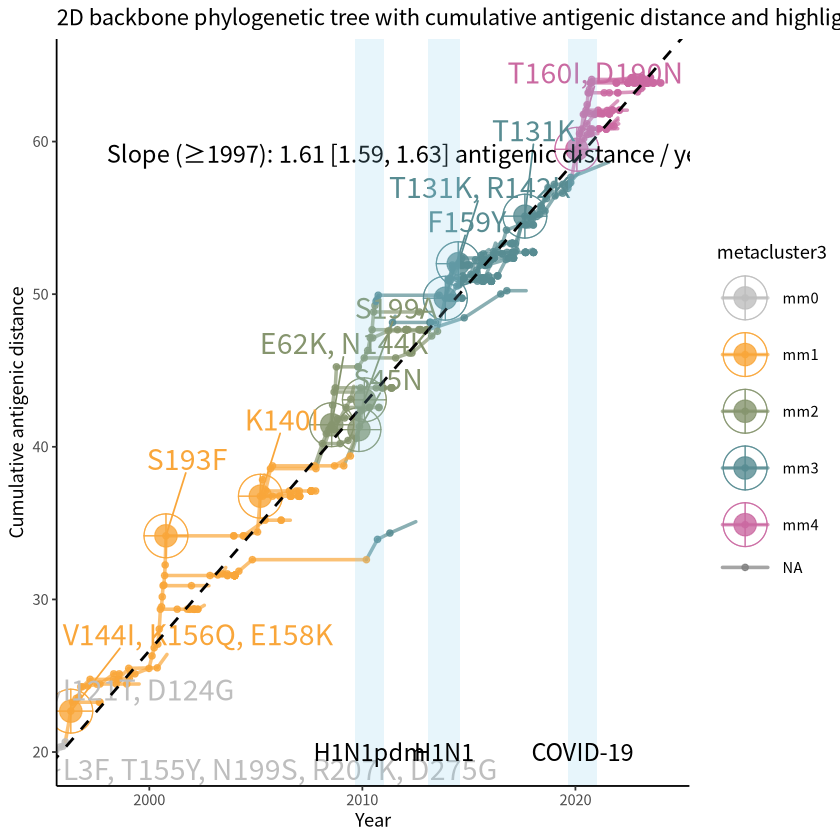

In [78]:
highlight_windows_dates <- highlight_windows_dates %>%
  mutate(
    x = (xmin + xmax) / 2,
    y = 20, 
    label = c("H1N1pdm", "H1N1", "COVID-19")
  )

p3_post1997 <- p2_post1997 + 
  geom_text(data = highlight_windows_dates,
            aes(x = x, y = y, label = label),
            inherit.aes = FALSE,
            size = 5, color = "black")

p3_post1997

In [81]:
highlight_windows_dates <- highlight_windows_dates %>%
  mutate(year = xmin)  

df_labels <- df_labels %>%
  mutate(year = as.numeric(gsub(".*@(\\d+).*", "\\1", label)))  

highlight_windows_dates <- left_join(highlight_windows_dates, df_labels %>% select(year, slope_label = label), by = "year")

highlight_windows_dates <- highlight_windows_dates %>%
  mutate(
    y_main = 23,
    y_slope = 21
  )
highlight_windows_dates

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `year = as.numeric(gsub(".*@(\\d+).*", "\\1", label))`.
Caused by warning:
! NAs introduced by coercion”


start_str  end_str    start_date end_date   xmin     xmax     x        y 
1 2009-09-01 2011-01-31 2009-09-01 2011-01-31 2009.667 2011.000 2010.333 20
2 2013-02-01 2014-08-31 2013-02-01 2014-08-31 2013.083 2014.583 2013.833 20
3 2019-09-01 2021-01-31 2019-09-01 2021-01-31 2019.667 2021.000 2020.333 20
  label    year     slope_label.x y_main y_slope slope_label.y
1 H1N1pdm  2009.667 NA            23     21      NA           
2 H1N1     2013.083 NA            23     21      NA           
3 COVID-19 2019.667 NA            23     21      NA

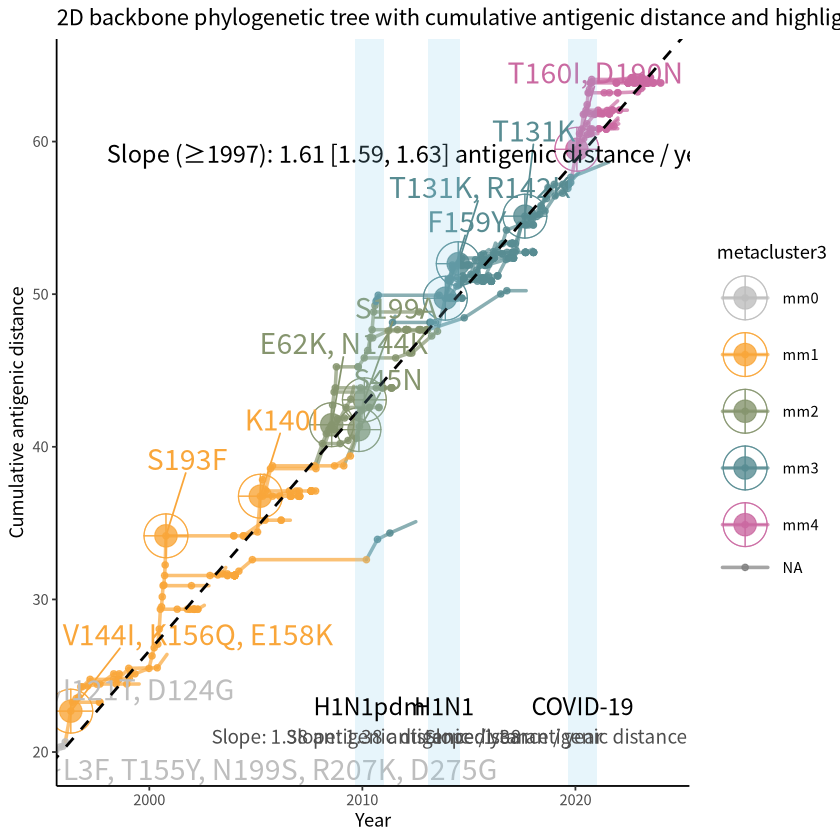

In [82]:
p4_post1997 <- p2_post1997 +
  geom_text(data = highlight_windows_dates,
            aes(x = x, y = y_main, label = label),
            inherit.aes = FALSE,
            size = 5, color = "black") +
  geom_text(data = highlight_windows_dates,
            aes(x = x, y = y_slope, label = slope_label),
            inherit.aes = FALSE,
            size = 4, color = "gray30")

p4_post1997

In [83]:
tree_data_post1997 <- p_post1997$data %>%
  filter(x >= 1997)

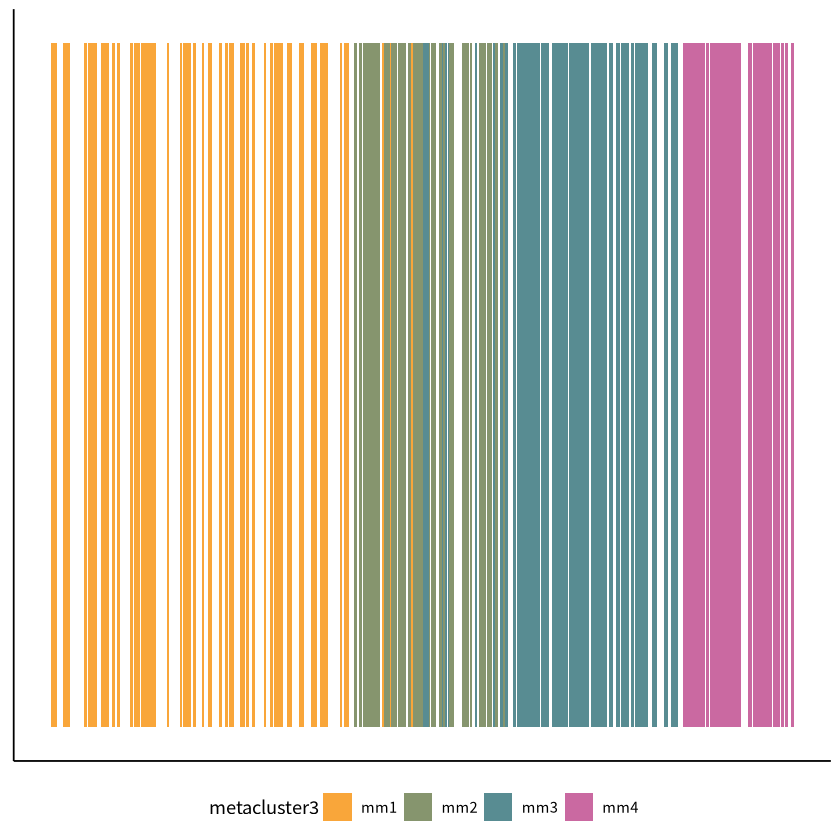

In [84]:
p_heatmap_mm <- ggplot(tree_data_post1997, aes(x = x, y = 0.5, fill = metacluster3)) +
  geom_tile(width = 0.1) +
  scale_fill_manual(values = heatmap_colors, name = "metacluster3") +
  theme_classic() +
  theme(
    axis.text.y = element_blank(),
    axis.title.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.ticks.x = element_blank(),
    legend.position = "bottom"
  )
p_heatmap_mm

In [85]:
p_tree <- p4_post1997 + theme_classic() 

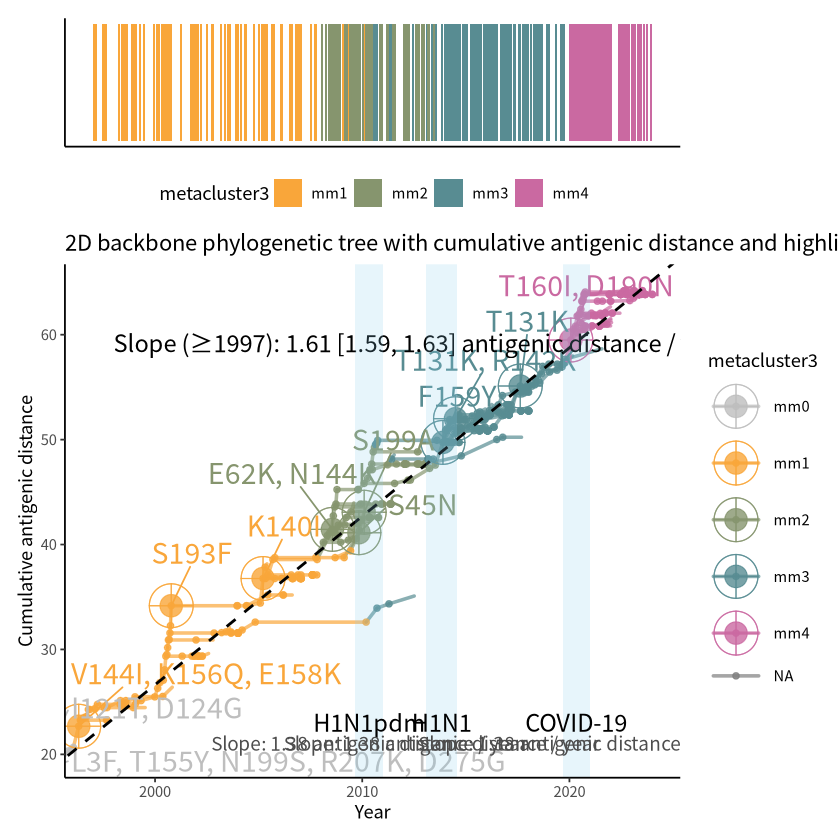

In [86]:
tree_with_heatmap <- p_heatmap_mm / p_tree + plot_layout(heights = c(1, 4))
tree_with_heatmap

#### add H3N2 case repport in USA from FluNet data

In [87]:
# library(tidyverse)
library(lubridate)
library(patchwork)

# FluNet data 
flunet_df <- read_csv("/data1/shusuke/Cartography/fitness_antigenicity_reg/infection_case_data/FluNet/FluNet_USA.csv")

flunet_df <- flunet_df %>%
  mutate(
    year_week = paste0(ISO_YEAR, "-", ISO_WEEK),
    date = as.Date(paste0(year_week, "-1"), format = "%Y-%W-%w"),
    month = floor_date(date, "month")
  )

monthly_counts <- flunet_df %>%
  group_by(month) %>%
  summarise(AH3 = sum(AH3, na.rm = TRUE)) %>%
  ungroup()

Rows: 1805 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): WHO region, ITZ, COUNTRY/AREA/TERRITORY, COUNTRY_CODE, ORIGIN_SOURCE
dbl  (17): ISO_YEAR, ISO_WEEK, SPEC_RECEIVED_NB, SPEC_PROCESSED_NB, AH1, AH1...
dttm  (1): ISO_SDATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `date = as.Date(paste0(year_week, "-1"), format = "%Y-%W-%w")`.
Caused by warning in `strptime()`:
! (0-based) yday 368 in year 2015 is invalid
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”


In [89]:
monthly_counts <- monthly_counts %>%
  mutate(
    x_numeric = year(month) + (month(month) - 1) / 12  # e.g., 2009-09 → 2009.67
  )
head(monthly_counts)

month      AH3 x_numeric
1 1997-01-01 773 1997.000 
2 1997-02-01 177 1997.083 
3 1997-03-01  50 1997.167 
4 1997-09-01   1 1997.667 
5 1997-10-01   0 1997.750 
6 1997-11-01   0 1997.833

In [90]:
min(tree_data_post1997$x)

[1] 1997.104

In [91]:
max(tree_data_post1997$x)

[1] 2024

In [92]:
monthly_counts_same_range <- monthly_counts %>%
  filter(x_numeric >= min(tree_data_post1997$x) & x_numeric <= max(tree_data_post1997$x))
tail(monthly_counts_same_range)

month      AH3  x_numeric
1 2023-08-01   37 2023.583 
2 2023-09-01   43 2023.667 
3 2023-10-01  141 2023.750 
4 2023-11-01  464 2023.833 
5 2023-12-01 1174 2023.917 
6 2024-01-01 1762 2024.000

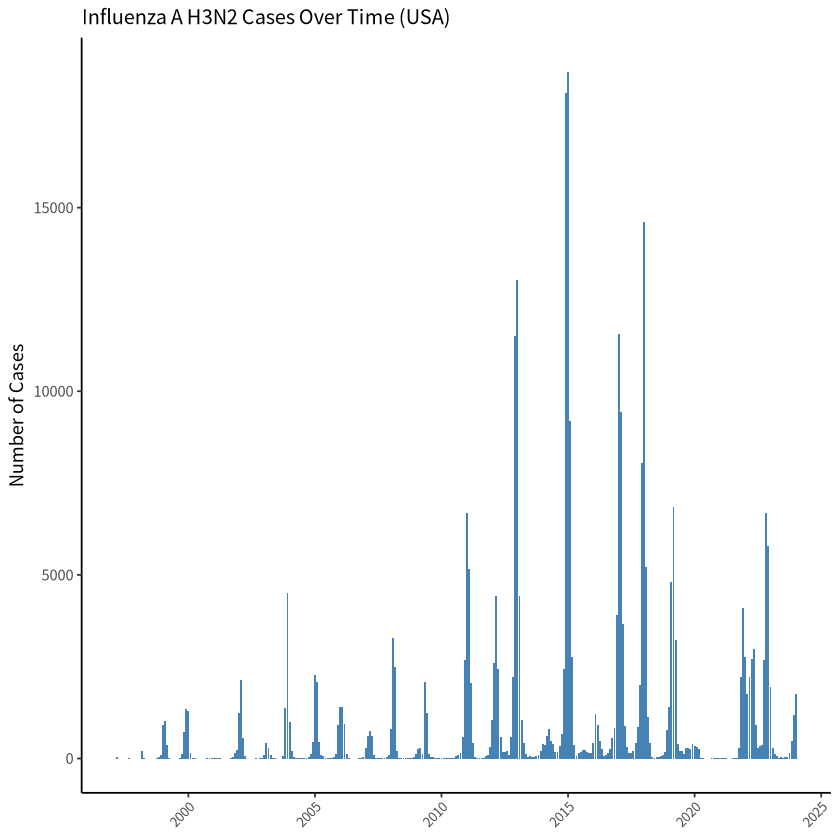

In [93]:
p_cases <- ggplot(monthly_counts_same_range, aes(x = x_numeric, y = AH3)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_classic() +
  labs(
    title = "Influenza A H3N2 Cases Over Time (USA)",
    x = NULL,
    y = "Number of Cases"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    plot.title = element_text(size = 12)
  )
p_cases

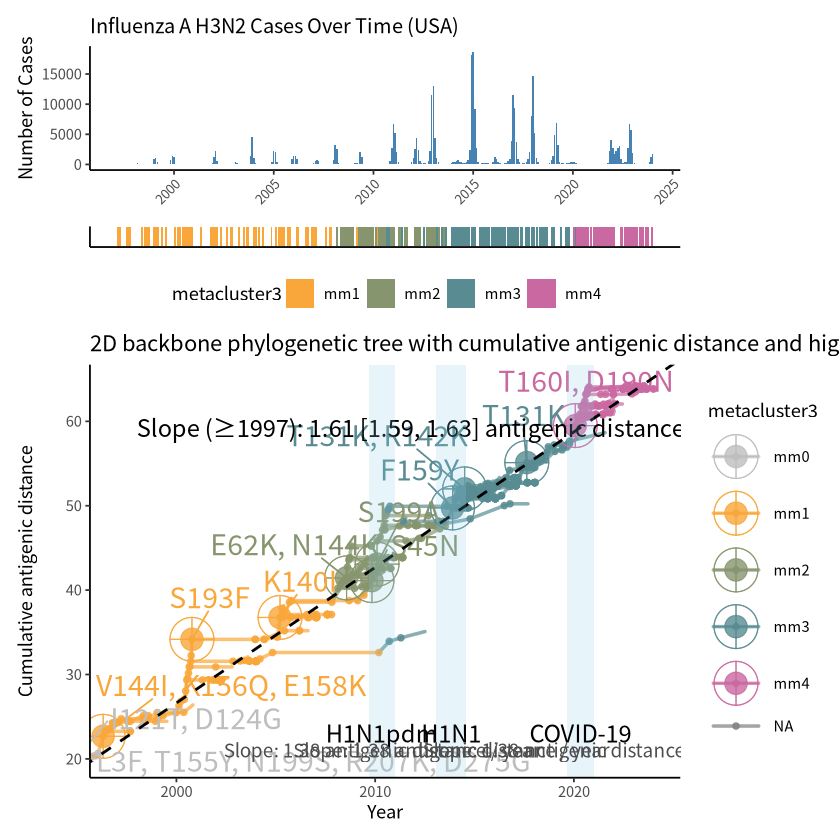

In [94]:
final_plot <- p_cases / p_heatmap_mm / p_tree +
  plot_layout(heights = c(1.5, 0.25, 5))

final_plot

In [146]:
ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_cumulative_backbonelessthan_10tips_with_clustershift_metametaheatmap_FluCase_seasonbase_v12_250722.pdf", plot = final_plot, width = 18, height = 10)

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Slope (≥1997): 1.61 [1.59, 1.63] antigenic distance / year' in 'mbcsToSbcs': >= substituted for ≥ (U+2265)”


#### use metacluster group data for making heatmap

In [95]:
metacluster_annot_full <- read.csv("/data1/shusuke/Cartography/For_paper_250401/Fig_3/PLANT_epiflu_human_241212_with_coords_20cluster.csv")
metacluster_annot <- metacluster_annot_full %>%
  select(ID, predicted_date, metacluster) %>%
  mutate(metacluster_group = case_when(
    metacluster %in% c("m 1") ~ "mm0",
    metacluster %in% c("m 2", "m 3", "m 4", "m 5") ~ "mm1",
    metacluster %in% c("m 6", "m 7", "m 8", "m 9") ~ "mm2",
    metacluster %in% c("m 10", "m 11", "m 12", "m 13", "m 14", "m 15", "m 16", "m 17") ~ "mm3",
    metacluster %in% c("m 18", "m 19", "m 20") ~ "mm4",
    TRUE ~ NA_character_
  ))
head(metacluster_annot)

ID        predicted_date metacluster metacluster_group
1 EPI144950 1980-09-13     m 1         mm0              
2 EPI131276 1980-07-07     m 1         mm0              
3 EPI545274 1980-05-18     m 1         mm0              
4 EPI240923 1980-06-24     m 1         mm0              
5 EPI240939 1980-07-05     m 1         mm0              
6 EPI240915 1980-07-07     m 1         mm0

In [96]:
metacluster_annot$metacluster_group <- as.factor(metacluster_annot$metacluster_group)
# convert YYYY-MM-DD to numeric year
metacluster_annot$predicted_date <- as.Date(metacluster_annot$predicted_date)
metacluster_annot$year <- year(metacluster_annot$predicted_date) +
  (yday(metacluster_annot$predicted_date) - 1) / 365.25
  

In [97]:
head(metacluster_annot)

ID        predicted_date metacluster metacluster_group year    
1 EPI144950 1980-09-13     m 1         mm0               1980.701
2 EPI131276 1980-07-07     m 1         mm0               1980.515
3 EPI545274 1980-05-18     m 1         mm0               1980.378
4 EPI240923 1980-06-24     m 1         mm0               1980.479
5 EPI240939 1980-07-05     m 1         mm0               1980.509
6 EPI240915 1980-07-07     m 1         mm0               1980.515

In [99]:
# show metacluster_annot for metacluster_group = "mm2"
metacluster_annot_mm2 <- metacluster_annot %>% filter(metacluster_group == "mm2")
head(metacluster_annot_mm2)

ID        predicted_date metacluster metacluster_group year    
1 EPI273124 2010-03-06     m 6         mm2               2010.175
2 EPI139273 2009-10-08     m 6         mm2               2009.767
3 EPI146048 2009-09-25     m 7         mm2               2009.731
4 EPI145693 2009-11-02     m 6         mm2               2009.835
5 EPI146153 2010-02-12     m 7         mm2               2010.115
6 EPI254158 2010-06-21     m 7         mm2               2010.468

In [100]:
min(metacluster_annot_mm2$year)

[1] 2009.186

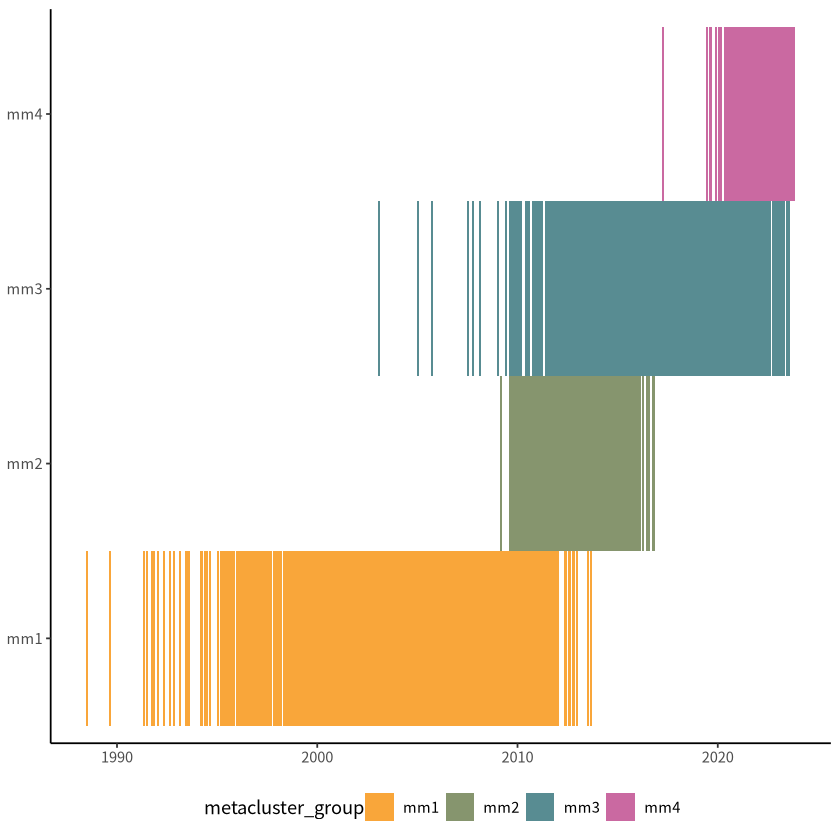

In [101]:
p_heatmap <- ggplot(metacluster_annot %>% filter(metacluster_group != "mm0"),
                    aes(x = year, y = metacluster_group, fill = metacluster_group)) +
  geom_tile(width = 0.1, height = 1) +
  scale_fill_manual(values = heatmap_colors, name = "metacluster_group") +
  theme_classic() +
  theme(
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    # axis.text.x = element_blank(),
    # axis.ticks.x = element_blank(),
    legend.position = "bottom"
  )
p_heatmap

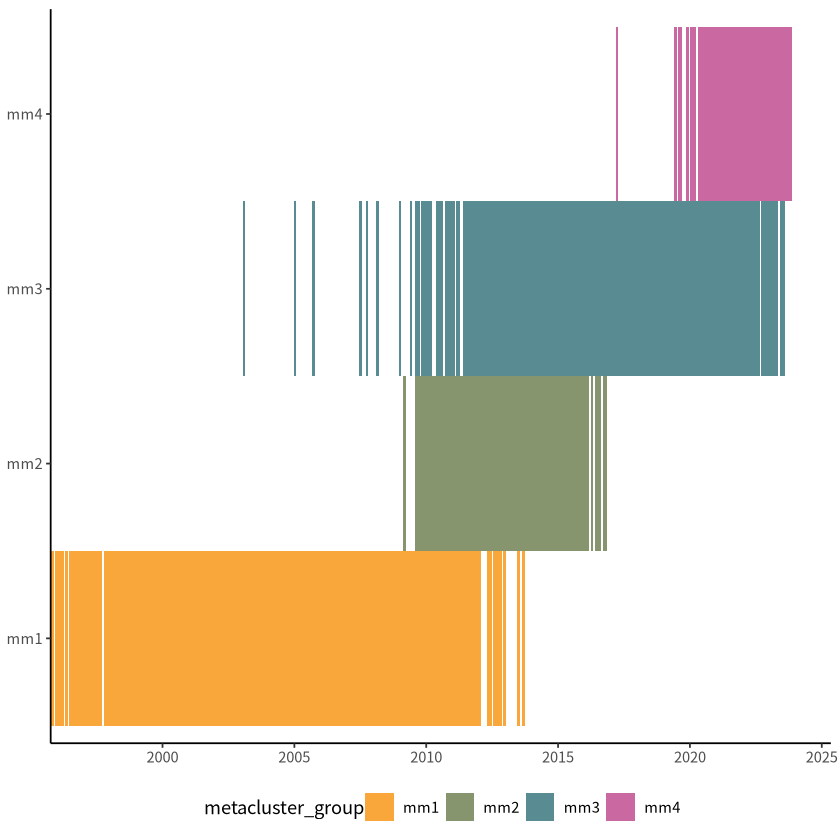

In [102]:
p_heatmap_same_xlim <- p_heatmap +
  coord_cartesian(xlim = c(min(tree_data_post1997$x), max(tree_data_post1997$x)))
p_heatmap_same_xlim

In [103]:
metacluster_annot_xrange_same <- metacluster_annot %>%
  filter(year >= min(tree_data_post1997$x) & year <= max(tree_data_post1997$x))

In [104]:
metacluster_annot_xrange_same <- metacluster_annot_xrange_same %>%
  mutate(month_bin = floor_date(predicted_date, unit = "month"))

monthly_counts <- metacluster_annot_xrange_same %>%
  filter(!is.na(metacluster_group)) %>%
  group_by(month_bin, metacluster_group) %>%
  summarise(count = n(), .groups = "drop")  

monthly_counts <- monthly_counts %>%
  group_by(month_bin) %>%
  mutate(prop = count / sum(count)) %>%
  ungroup()

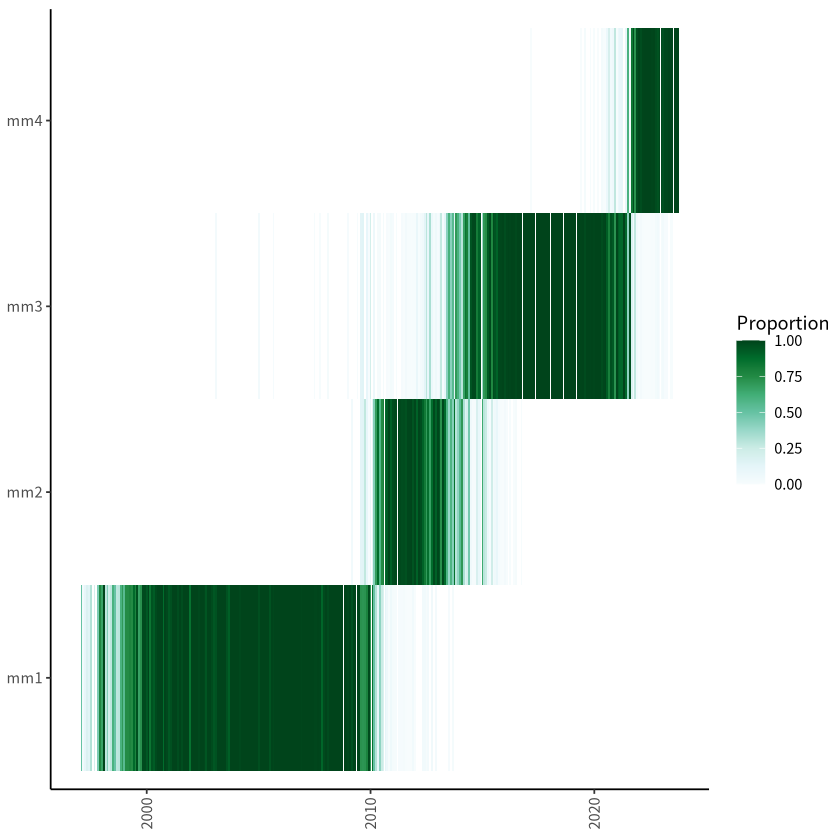

In [105]:
p_heatmap_monthly <- ggplot(monthly_counts %>% filter(metacluster_group != "mm0"),
                            aes(x = month_bin, y = metacluster_group, fill = prop)) +
  geom_tile(width = 30) +
  scale_fill_gradientn(colours = brewer.pal(9, "BuGn"), name = "Proportion",limits = c(0,1)) +
  theme_classic() +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    legend.position = "right"
  ) 

p_heatmap_monthly

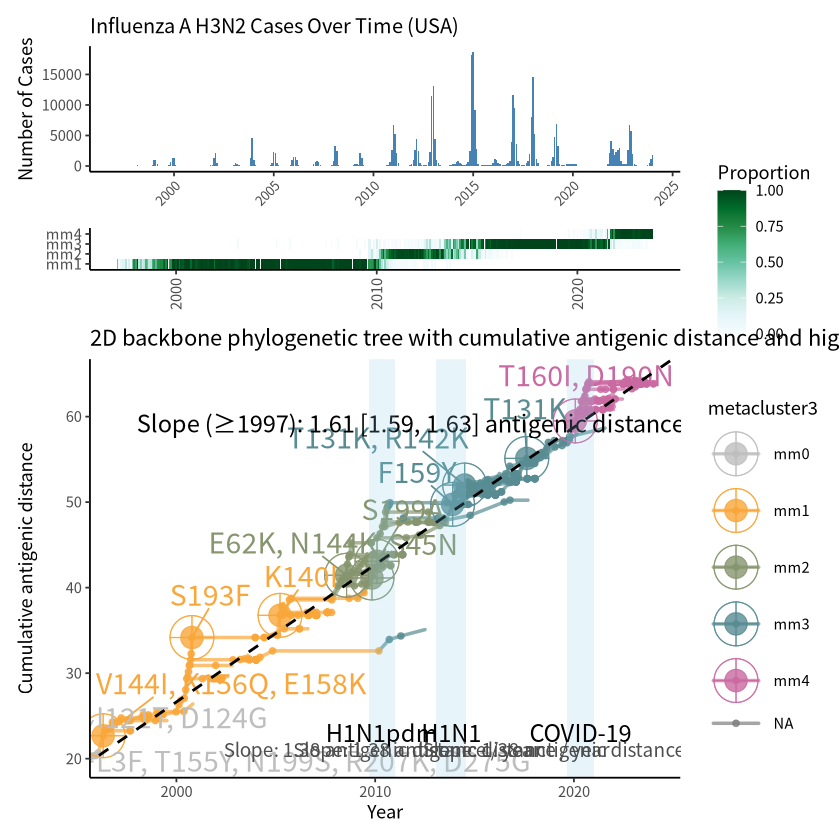

In [106]:
finalfinal_plot <- p_cases / p_heatmap_monthly / p_tree +
  plot_layout(heights = c(1.5, 0.5, 5))

finalfinal_plot

In [158]:
ggsave("/data1/shusuke/Cartography/For_paper_250401/Fig_3/2D_phylogeny_cumulative_backbonelessthan_10tips_with_clustershift_metagroup_FluCase_seasonbase_v14_250722.pdf", plot = finalfinal_plot, width = 18, height = 10)

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Slope (≥1997): 1.61 [1.59, 1.63] antigenic distance / year' in 'mbcsToSbcs': >= substituted for ≥ (U+2265)”
